# **EDA Assignment NYC Taxi - Tejas Bokare**

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.24.3
pandas version: 1.5.3
matplotlib version: 3.7.1
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/tejasbokare/Documents/NYC Taxi Assignment/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

sampled_data = [] # Initiated list by the name sampled_data

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file

        monthly_data = pd.read_parquet(file_path)
        
        #monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date, daily_data in monthly_data.groupby('date'):
            
            # Iterate through each hour of the selected date
            for hour, hour_data in daily_data.groupby('hour'):
                

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data.append(sample)

        # Concatenate the sampled data of all the dates to a single dataframe
        #df = pd.concat(sampled_data, ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
        
df = pd.concat(sampled_data, ignore_index=True) # Sampled Data moved to dataframe df

Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
# Store the df in csv/parquet
df.to_parquet('sampled_monthly_data.parquet') #Parquet file sampled_monthly_data.parquet created to store the sampled data.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file
# New dataframe df2 created to read the parquet file for the sampled data
df2 = pd.read_parquet('/Users/tejasbokare/Documents/NYC Taxi Assignment/Datasets and Dictionary/trip_records/sampled_monthly_data.parquet')


In [8]:
df2.shape

(5473911, 22)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473911 entries, 0 to 5473910
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [10]:
df2.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1         2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
2         2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
4         2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.31         1.0                  N           163           162   
1           1.22         1.0                  N           161           229   
2           3.99         1.0                  N           148            50   
3           4.79         NaN               None           231            61   
4           1.05         1.0                  N           161           161   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        3.00           0.0   
1             1  ...      0.5        1.43           0.0   
2             1  ...      0.5        5.66           0.0   
3             0  ...      0.5        3.00           0.0   
4             1  ...      0.5        3.14           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         18.00                   2.5          0.0   
1                    1.0         15.73                   2.5          0.0   
2                    1.0         33.96                   2.5          0.0   
3                    1.0         29.43                   NaN          NaN   
4                    1.0         18.84                   2.5          0.0   

         date  hour airport_fee  
0  2023-11-30    23         NaN  
1  2023-11-30    23         NaN  
2  2023-12-01     0         NaN  
3  2023-12-01     0         NaN  
4  2023-12-01     0         NaN  

[5 rows x 22 columns]

In [11]:
# The sampled data reduced to 300000 entries for the upcoming analysis
reduced_sample = df2.sample(n = 300000, random_state = 42)

In [12]:
reduced_sample.shape

(300000, 22)

In [13]:
# Reduced sample of 300000 moved to a new parquet file - reduced_sample_data.parquet
reduced_sample.to_parquet('reduced_sample_data.parquet')

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [5]:
# Fix the index and drop any columns that are not needed
# Reduced sample data loaded to new dataframe df3
df3 = pd.read_parquet('/Users/tejasbokare/Documents/NYC Taxi Assignment/Datasets and Dictionary/trip_records/reduced_sample_data.parquet')


In [6]:
df3.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2422800         2  2023-05-31 14:01:56   2023-05-31 14:06:42              1.0   
5075963         1  2023-09-15 12:57:03   2023-09-15 13:34:31              1.0   
3220015         2  2023-08-27 12:55:43   2023-08-27 13:05:38              5.0   
4928935         2  2023-07-17 16:02:27   2023-07-17 16:18:56              1.0   
3887963         2  2023-11-08 12:55:11   2023-11-08 13:11:10              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2422800           0.44         1.0                  N           161   
5075963          17.20         3.0                  N           163   
3220015           2.32         1.0                  N           239   
4928935           2.13         1.0                  N           164   
3887963           1.72         1.0                  N           164   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
2422800           170             1  ...      0.5        1.00           0.0   
5075963             1             1  ...      0.0       22.35          24.0   
3220015            48             2  ...      0.5        0.00           0.0   
4928935           237             1  ...      0.5        2.00           0.0   
3887963           141             2  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
2422800                    1.0         11.50                   2.5   
5075963                    1.0        134.05                   0.0   
3220015                    1.0         16.80                   2.5   
4928935                    1.0         24.80                   2.5   
3887963                    1.0         18.90                   2.5   

         Airport_fee        date  hour airport_fee  
2422800          0.0  2023-05-31    14         NaN  
5075963          0.0  2023-09-15    12         NaN  
3220015          0.0  2023-08-27    12         NaN  
4928935          0.0  2023-07-17    16         NaN  
3887963          0.0  2023-11-08    12         NaN  

[5 rows x 22 columns]

In [7]:
df3.reset_index(inplace = True)

In [8]:
# The index column present earlier in the DF is dropped 
df3.drop(columns = 'index', inplace = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
# Combine the two airport fee columns
df3['Airport_fee_updated'] = df3['Airport_fee'].fillna(0) + df3['airport_fee'].fillna(0)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [10]:
# check where values of fare amount are negative
# checking if amounts in mta_tax are negative
df3['mta_tax'] < 0


0         False
1         False
2         False
3         False
4         False
          ...  
299995    False
299996    False
299997    False
299998    False
299999    False
Name: mta_tax, Length: 300000, dtype: bool

In [11]:
# checking if amounts in mta_tax are negative
df3[df3['mta_tax'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10147          2  2023-07-03 14:46:17   2023-07-03 15:03:59              1.0   
20451          2  2023-09-18 15:56:01   2023-09-18 15:59:19              5.0   
20951          2  2023-10-27 09:30:10   2023-10-27 09:30:42              1.0   
26240          2  2023-08-15 20:49:17   2023-08-15 20:49:36              1.0   
40379          2  2023-12-05 15:54:13   2023-12-05 15:54:37              1.0   
40894          2  2023-03-12 17:39:40   2023-03-12 17:40:17              1.0   
124727         2  2023-10-12 14:55:27   2023-10-12 14:55:56              1.0   
149685         2  2023-01-27 09:50:48   2023-01-27 09:51:43              3.0   
216465         2  2023-10-02 19:47:16   2023-10-02 19:47:29              1.0   
278557         2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
279116         2  2023-05-11 12:02:18   2023-05-11 12:02:29              2.0   
282416         2  2023-01-18 16:02:47   2023-01-18 16:02:49              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
10147            2.58         1.0                  N           163   
20451            0.25         2.0                  N           132   
20951            0.01         2.0                  N           162   
26240            0.00         1.0                  N           164   
40379            0.00         1.0                  N           132   
40894            0.00         2.0                  N           230   
124727           0.00         1.0                  N           162   
149685           0.16         2.0                  N           138   
216465           0.01         1.0                  N           132   
278557          24.18         4.0                  N           138   
279116           0.02         2.0                  N           194   
282416           0.00         2.0                  N           140   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
10147            238             2  ...         0.0           0.0   
20451            132             2  ...         0.0           0.0   
20951            162             2  ...         0.0           0.0   
26240            164             2  ...         0.0           0.0   
40379            132             2  ...         0.0           0.0   
40894            161             2  ...         0.0           0.0   
124727           162             4  ...         0.0           0.0   
149685           138             2  ...         0.0           0.0   
216465           132             2  ...         0.0           0.0   
278557           265             2  ...         0.0           0.0   
279116           194             2  ...         0.0           0.0   
282416           140             2  ...         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
10147                    -1.0         -4.00                  -2.5   
20451                    -1.0         -3.25                   0.0   
20951                    -1.0         -4.00                  -2.5   
26240                    -1.0         -4.00                  -2.5   
40379                    -1.0         -1.50                   0.0   
40894                    -1.0         -4.00                  -2.5   
124727                   -1.0         -4.00                  -2.5   
149685                   -1.0         -2.75                   0.0   
216465                   -1.0         -3.25                   0.0   
278557                   -1.0         -3.25                   0.0   
279116                   -1.0         -1.50                   0.0   
282416                   -1.0         -4.00                  -2.5   

        Airport_fee        date  hour  airport_fee Airport_fee_updated  
10147          0.00  2023-07-03    14          NaN                0.00  
20451         -1.75  2023-09-18    15          NaN               -1.75  
20951          0.00  2023-10-27     9    

In [12]:
# checking if amounts in improvement_surcharge are negative
df3['improvement_surcharge'] < 0
df3[df3['improvement_surcharge'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10147          2  2023-07-03 14:46:17   2023-07-03 15:03:59              1.0   
20451          2  2023-09-18 15:56:01   2023-09-18 15:59:19              5.0   
20951          2  2023-10-27 09:30:10   2023-10-27 09:30:42              1.0   
26240          2  2023-08-15 20:49:17   2023-08-15 20:49:36              1.0   
40379          2  2023-12-05 15:54:13   2023-12-05 15:54:37              1.0   
40894          2  2023-03-12 17:39:40   2023-03-12 17:40:17              1.0   
97511          2  2023-02-08 17:51:09   2023-02-08 19:00:49              1.0   
124727         2  2023-10-12 14:55:27   2023-10-12 14:55:56              1.0   
149685         2  2023-01-27 09:50:48   2023-01-27 09:51:43              3.0   
216465         2  2023-10-02 19:47:16   2023-10-02 19:47:29              1.0   
278557         2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
279116         2  2023-05-11 12:02:18   2023-05-11 12:02:29              2.0   
282416         2  2023-01-18 16:02:47   2023-01-18 16:02:49              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
10147            2.58         1.0                  N           163   
20451            0.25         2.0                  N           132   
20951            0.01         2.0                  N           162   
26240            0.00         1.0                  N           164   
40379            0.00         1.0                  N           132   
40894            0.00         2.0                  N           230   
97511           22.26         5.0                  N           132   
124727           0.00         1.0                  N           162   
149685           0.16         2.0                  N           138   
216465           0.01         1.0                  N           132   
278557          24.18         4.0                  N           138   
279116           0.02         2.0                  N           194   
282416           0.00         2.0                  N           140   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
10147            238             2  ...         0.0           0.0   
20451            132             2  ...         0.0           0.0   
20951            162             2  ...         0.0           0.0   
26240            164             2  ...         0.0           0.0   
40379            132             2  ...         0.0           0.0   
40894            161             2  ...         0.0           0.0   
97511            265             2  ...         0.0           0.0   
124727           162             4  ...         0.0           0.0   
149685           138             2  ...         0.0           0.0   
216465           132             2  ...         0.0           0.0   
278557           265             2  ...         0.0           0.0   
279116           194             2  ...         0.0           0.0   
282416           140             2  ...         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
10147                    -1.0         -4.00                  -2.5   
20451                    -1.0         -3.25                   0.0   
20951                    -1.0         -4.00                  -2.5   
26240                    -1.0         -4.00                  -2.5   
40379                    -1.0         -1.50                   0.0   
40894                    -1.0         -4.00                  -2.5   
97511                    -1.0         -2.25                   0.0   
124727                   -1.0         -4.00                  -2.5   
149685                   -1.0         -2.75                   0.0   
216465                   -1.0         -3.25                   0.0   
278557                   -1.0         -3.25                   0.0   
279116                   -1.0         -1.50                   0.0   
282416                   -1.0         -4.0

In [13]:
# checking if amounts in total_amount are negative
df3['total_amount'] < 0
df3[df3['total_amount'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10147          2  2023-07-03 14:46:17   2023-07-03 15:03:59              1.0   
20451          2  2023-09-18 15:56:01   2023-09-18 15:59:19              5.0   
20951          2  2023-10-27 09:30:10   2023-10-27 09:30:42              1.0   
26240          2  2023-08-15 20:49:17   2023-08-15 20:49:36              1.0   
40379          2  2023-12-05 15:54:13   2023-12-05 15:54:37              1.0   
40894          2  2023-03-12 17:39:40   2023-03-12 17:40:17              1.0   
97511          2  2023-02-08 17:51:09   2023-02-08 19:00:49              1.0   
124727         2  2023-10-12 14:55:27   2023-10-12 14:55:56              1.0   
149685         2  2023-01-27 09:50:48   2023-01-27 09:51:43              3.0   
216465         2  2023-10-02 19:47:16   2023-10-02 19:47:29              1.0   
278557         2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
279116         2  2023-05-11 12:02:18   2023-05-11 12:02:29              2.0   
282416         2  2023-01-18 16:02:47   2023-01-18 16:02:49              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
10147            2.58         1.0                  N           163   
20451            0.25         2.0                  N           132   
20951            0.01         2.0                  N           162   
26240            0.00         1.0                  N           164   
40379            0.00         1.0                  N           132   
40894            0.00         2.0                  N           230   
97511           22.26         5.0                  N           132   
124727           0.00         1.0                  N           162   
149685           0.16         2.0                  N           138   
216465           0.01         1.0                  N           132   
278557          24.18         4.0                  N           138   
279116           0.02         2.0                  N           194   
282416           0.00         2.0                  N           140   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
10147            238             2  ...         0.0           0.0   
20451            132             2  ...         0.0           0.0   
20951            162             2  ...         0.0           0.0   
26240            164             2  ...         0.0           0.0   
40379            132             2  ...         0.0           0.0   
40894            161             2  ...         0.0           0.0   
97511            265             2  ...         0.0           0.0   
124727           162             4  ...         0.0           0.0   
149685           138             2  ...         0.0           0.0   
216465           132             2  ...         0.0           0.0   
278557           265             2  ...         0.0           0.0   
279116           194             2  ...         0.0           0.0   
282416           140             2  ...         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
10147                    -1.0         -4.00                  -2.5   
20451                    -1.0         -3.25                   0.0   
20951                    -1.0         -4.00                  -2.5   
26240                    -1.0         -4.00                  -2.5   
40379                    -1.0         -1.50                   0.0   
40894                    -1.0         -4.00                  -2.5   
97511                    -1.0         -2.25                   0.0   
124727                   -1.0         -4.00                  -2.5   
149685                   -1.0         -2.75                   0.0   
216465                   -1.0         -3.25                   0.0   
278557                   -1.0         -3.25                   0.0   
279116                   -1.0         -1.50                   0.0   
282416                   -1.0         -4.0

In [14]:
# checking if amounts in congestion_surcharge are negative
df3['congestion_surcharge'] < 0
df3[df3['congestion_surcharge'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10147          2  2023-07-03 14:46:17   2023-07-03 15:03:59              1.0   
20951          2  2023-10-27 09:30:10   2023-10-27 09:30:42              1.0   
26240          2  2023-08-15 20:49:17   2023-08-15 20:49:36              1.0   
40894          2  2023-03-12 17:39:40   2023-03-12 17:40:17              1.0   
124727         2  2023-10-12 14:55:27   2023-10-12 14:55:56              1.0   
282416         2  2023-01-18 16:02:47   2023-01-18 16:02:49              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
10147            2.58         1.0                  N           163   
20951            0.01         2.0                  N           162   
26240            0.00         1.0                  N           164   
40894            0.00         2.0                  N           230   
124727           0.00         1.0                  N           162   
282416           0.00         2.0                  N           140   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
10147            238             2  ...         0.0           0.0   
20951            162             2  ...         0.0           0.0   
26240            164             2  ...         0.0           0.0   
40894            161             2  ...         0.0           0.0   
124727           162             4  ...         0.0           0.0   
282416           140             2  ...         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
10147                    -1.0          -4.0                  -2.5   
20951                    -1.0          -4.0                  -2.5   
26240                    -1.0          -4.0                  -2.5   
40894                    -1.0          -4.0                  -2.5   
124727                   -1.0          -4.0                  -2.5   
282416                   -1.0          -4.0                  -2.5   

        Airport_fee        date  hour  airport_fee Airport_fee_updated  
10147           0.0  2023-07-03    14          NaN                 0.0  
20951           0.0  2023-10-27     9          NaN                 0.0  
26240           0.0  2023-08-15    20          NaN                 0.0  
40894           0.0  2023-03-12    17          NaN                 0.0  
124727          0.0  2023-10-12    14          NaN                 0.0  
282416          NaN  2023-01-18    16          0.0                 0.0  

[6 rows x 23 columns]

In [15]:
# checking if amounts in Airport_fee_updated are negative
df3['Airport_fee_updated'] < 0
df3[df3['Airport_fee_updated'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
20451          2  2023-09-18 15:56:01   2023-09-18 15:59:19              5.0   
97511          2  2023-02-08 17:51:09   2023-02-08 19:00:49              1.0   
149685         2  2023-01-27 09:50:48   2023-01-27 09:51:43              3.0   
216465         2  2023-10-02 19:47:16   2023-10-02 19:47:29              1.0   
278557         2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
20451            0.25         2.0                  N           132   
97511           22.26         5.0                  N           132   
149685           0.16         2.0                  N           138   
216465           0.01         1.0                  N           132   
278557          24.18         4.0                  N           138   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
20451            132             2  ...         0.0           0.0   
97511            265             2  ...         0.0           0.0   
149685           138             2  ...         0.0           0.0   
216465           132             2  ...         0.0           0.0   
278557           265             2  ...         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
20451                    -1.0         -3.25                   0.0   
97511                    -1.0         -2.25                   0.0   
149685                   -1.0         -2.75                   0.0   
216465                   -1.0         -3.25                   0.0   
278557                   -1.0         -3.25                   0.0   

        Airport_fee        date  hour  airport_fee Airport_fee_updated  
20451         -1.75  2023-09-18    15          NaN               -1.75  
97511         -1.25  2023-02-08    17          NaN               -1.25  
149685          NaN  2023-01-27     9        -1.25               -1.25  
216465        -1.75  2023-10-02    19          NaN               -1.75  
278557        -1.75  2023-09-25     0          NaN               -1.75  

[5 rows x 23 columns]

In [16]:
# checking if amounts in fare_amount are negative
df3['fare_amount'] < 0
df3[df3['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour, airport_fee, Airport_fee_updated]
Index: []

[0 rows x 23 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [17]:
# Analyse RatecodeID for the negative fare amounts
df3.groupby('RatecodeID')['total_amount'].agg(['count', 'sum', 'min', 'max'])


count         sum    min     max
RatecodeID                                   
1.0         273559  6938912.61  -4.00  366.84
2.0          11595  1070154.20  -4.00  172.69
3.0            971   115382.92  24.00  258.45
4.0            628    85759.24  -3.25  927.75
5.0           1626   144494.85  -2.25  801.00
6.0              1        5.00   5.00    5.00
99.0          1648    61350.52   0.00  400.00

In [18]:
# Find which columns have negative values
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[ns]
 3   passenger_count        290028 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             290028 non-null  float64       
 6   store_and_fwd_flag     290028 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

In [19]:
df3['payment_type'] < 0
df3[df3['payment_type'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour, airport_fee, Airport_fee_updated]
Index: []

[0 rows x 23 columns]

In [20]:
# fix these negative values
df3['mta_tax'] = df3['mta_tax'].abs()
df3['improvement_surcharge'] = df3['improvement_surcharge'].abs()
df3['total_amount'] = df3['total_amount'].abs()
df3['congestion_surcharge'] = df3['congestion_surcharge'].abs()
df3['Airport_fee_updated'] = df3['Airport_fee_updated'].abs()

In [21]:
# checking for any negative values present
df3['Airport_fee_updated'] < 0
df3[df3['Airport_fee_updated'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, date, hour, airport_fee, Airport_fee_updated]
Index: []

[0 rows x 23 columns]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [22]:
# Find the proportion of missing values in each column
(df3.isna().mean())*100


VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.324000
trip_distance             0.000000
RatecodeID                3.324000
store_and_fwd_flag        3.324000
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.324000
Airport_fee              10.943333
date                      0.000000
hour                      0.000000
airport_fee              92.380667
Airport_fee_updated       0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df3[df3.isnull().any(axis=1)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-05-31 14:01:56   2023-05-31 14:06:42              1.0   
1              1  2023-09-15 12:57:03   2023-09-15 13:34:31              1.0   
2              2  2023-08-27 12:55:43   2023-08-27 13:05:38              5.0   
3              2  2023-07-17 16:02:27   2023-07-17 16:18:56              1.0   
4              2  2023-11-08 12:55:11   2023-11-08 13:11:10              1.0   
...          ...                  ...                   ...              ...   
299995         2  2023-01-09 12:49:31   2023-01-09 13:26:11              1.0   
299996         1  2023-01-27 21:30:26   2023-01-27 22:15:30              1.0   
299997         2  2023-11-23 21:52:02   2023-11-23 22:09:33              1.0   
299998         2  2023-12-02 17:56:45   2023-12-02 18:09:18              1.0   
299999         2  2023-05-08 09:56:43   2023-05-08 10:11:06              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                0.44         1.0                  N           161   
1               17.20         3.0                  N           163   
2                2.32         1.0                  N           239   
3                2.13         1.0                  N           164   
4                1.72         1.0                  N           164   
...               ...         ...                ...           ...   
299995          10.17         1.0                  N           138   
299996          18.10         2.0                  N           132   
299997           3.32         1.0                  N            43   
299998           1.34         1.0                  N           236   
299999           1.74         1.0                  N           162   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                170             1  ...        1.00          0.00   
1                  1             1  ...       22.35         24.00   
2                 48             2  ...        0.00          0.00   
3                237             1  ...        2.00          0.00   
4                141             2  ...        0.00          0.00   
...              ...           ...  ...         ...           ...   
299995           231             1  ...       11.36          0.00   
299996           231             1  ...       16.35          6.55   
299997            41             1  ...        2.98          0.00   
299998           237             1  ...        1.00          0.00   
299999            90             2  ...        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
0                         1.0         11.50                   2.5   
1                         1.0        134.05                   0.0   
2                         1.0         16.80                   2.5   
3                         1.0         24.80                   2.5   
4                         1.0         18.90                   2.5   
...                       ...           ...                   ...   
299995                    1.0         69.41                   2.5   
299996                    1.0         98.15                   2.5   
299997                    1.0         27.78                   2.5   
299998                    1.0         17.80                   2.5   
299999                    1.0         18.20                   2.5   

        Airport_fee        date  hour  airport_fee Airport_fee_updated  
0               0.0  2023-05-31    14          NaN                0.00  
1               0.0  2023-09-15    12          NaN                0.00  
2               0.0  2023-08-27    12          NaN                0.00  
3               0.0  2023-07-17    16          NaN                0.00  
4               0.0  2023-11-08    12          NaN                0.00  
...             ...         ...   ...          ...                 ...  
299995          NaN  2023-01-09    12

Did you find zeroes in passenger_count? Handle these.

In [24]:
# Plot to identify maximum frequency for passenger_count
plt.hist(df3['passenger_count'].dropna(), bins=10, edgecolor='black')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Count')
plt.show()

In [25]:
# Median value for passenger_count
df3['passenger_count'].median()

1.0

In [27]:
df3['passenger_count'].value_counts()

1.0    228357
2.0     43924
3.0     10509
4.0      6180
0.0      4831
5.0      3744
6.0      2455
Name: passenger_count, dtype: int64

In [28]:
# Grouping of Passenger count with Trip distances to identify number of passengers for no. of trips travelled.
df3.groupby('passenger_count')['trip_distance'].agg(['count', 'min', 'max'])

count  min        max
passenger_count                        
0.0                4831  0.0      59.50
1.0              228357  0.0  126360.46
2.0               43924  0.0      57.55
3.0               10509  0.0      49.16
4.0                6180  0.0      52.75
5.0                3744  0.0      45.85
6.0                2455  0.0      46.22

In [29]:
df3.loc[(df3['trip_distance'] > 0) & (df3['passenger_count'] == 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
54             1  2023-10-17 23:23:42   2023-10-17 23:29:25              0.0   
166            1  2023-07-19 14:37:32   2023-07-19 14:54:02              0.0   
189            1  2023-09-16 21:53:34   2023-09-16 22:03:31              0.0   
225            1  2023-01-08 02:25:14   2023-01-08 02:40:26              0.0   
423            1  2023-11-17 17:25:15   2023-11-17 17:35:33              0.0   
...          ...                  ...                   ...              ...   
299655         1  2023-11-18 12:50:11   2023-11-18 12:52:20              0.0   
299771         1  2023-10-10 17:08:46   2023-10-10 17:18:10              0.0   
299869         1  2023-06-23 10:27:19   2023-06-23 10:51:32              0.0   
299872         1  2023-05-14 17:06:27   2023-05-14 17:35:05              0.0   
299977         1  2023-10-27 01:34:56   2023-10-27 01:47:50              0.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
54                0.6         1.0                  N           161   
166               2.6         1.0                  N           232   
189               1.7         1.0                  N           238   
225               4.1         1.0                  N           144   
423               0.7         1.0                  N           162   
...               ...         ...                ...           ...   
299655            0.7         1.0                  N           164   
299771            0.8         1.0                  N           142   
299869            8.7         1.0                  N            70   
299872            5.4         1.0                  Y           186   
299977            1.8         1.0                  N           144   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
54               229             1  ...        1.50          0.00   
166               79             3  ...        0.00          0.00   
189               41             2  ...        0.00          0.00   
225              141             1  ...        4.80          0.00   
423              229             1  ...        3.75          0.00   
...              ...           ...  ...         ...           ...   
299655           113             2  ...        0.00          0.00   
299771           237             1  ...        3.00          0.00   
299869           161             1  ...        6.00          6.55   
299872            74             1  ...        2.00          0.00   
299977           211             1  ...        3.80          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
54                        1.0         13.70                   2.5   
166                       1.0         19.60                   2.5   
189                       1.0         14.60                   0.0   
225                       1.0         28.90                   2.5   
423                       1.0         18.85                   2.5   
...                       ...           ...                   ...   
299655                    1.0          9.10                   2.5   
299771                    1.0         18.10                   2.5   
299869                    1.0         59.20                   2.5   
299872                    1.0         34.90                   2.5   
299977                    1.0         23.00                   2.5   

        Airport_fee        date  hour  airport_fee Airport_fee_updated  
54             0.00  2023-10-17    23          NaN                0.00  
166            0.00  2023-07-19    14          NaN                0.00  
189            0.00  2023-09-16    21          NaN                0.00  
225             NaN  2023-01-08     2          0.0                0.00  
423            0.00  2023-11-17    17          NaN                0.00  
...             ...         ...   ...          ...                 ...  
299655         0.00  2023-11-18    12

In [30]:
df3.loc[df3['passenger_count'] == 0, 'passenger_count'] = np.nan
df3['passenger_count'].fillna(df3['passenger_count'].median(), inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [31]:
# Finding missing values in 'RatecodeID'
df3[df3.RatecodeID.isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29             2  2023-06-02 20:48:17   2023-06-02 20:49:08              1.0   
87             1  2023-10-11 20:51:50   2023-10-11 20:58:01              1.0   
131            2  2023-03-17 16:55:44   2023-03-17 17:45:02              1.0   
148            2  2023-06-30 08:00:44   2023-06-30 08:12:09              1.0   
188            1  2023-04-05 08:43:27   2023-04-05 08:57:06              1.0   
...          ...                  ...                   ...              ...   
299892         1  2023-06-07 10:39:28   2023-06-07 11:11:04              1.0   
299897         2  2023-06-12 14:36:41   2023-06-12 14:49:51              1.0   
299905         2  2023-07-21 16:23:34   2023-07-21 16:36:23              1.0   
299924         1  2023-06-13 19:22:49   2023-06-13 19:33:27              1.0   
299947         1  2023-11-30 22:34:27   2023-11-30 22:47:59              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
29               0.14         NaN               None           231   
87               0.00         NaN               None           164   
131              8.05         NaN               None            37   
148              1.27         NaN               None           262   
188              1.60         NaN               None           107   
...               ...         ...                ...           ...   
299892           0.00         NaN               None           224   
299897           1.78         NaN               None           114   
299905           2.13         NaN               None            91   
299924           1.20         NaN               None           237   
299947           2.50         NaN               None           114   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
29               231             0  ...        2.00           0.0   
87               230             0  ...        0.00           0.0   
131               43             0  ...        1.00           0.0   
148              237             0  ...        3.00           0.0   
188              161             0  ...        2.73           0.0   
...              ...           ...  ...         ...           ...   
299892            40             0  ...        0.00           0.0   
299897           186             0  ...        1.83           0.0   
299905           149             0  ...        0.61           0.0   
299924           233             0  ...        1.79           0.0   
299947            68             0  ...        4.12           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
29                        1.0         39.96                   NaN   
87                        1.0         14.79                   NaN   
131                       1.0         40.32                   NaN   
148                       1.0         18.00                   NaN   
188                       1.0         20.93                   NaN   
...                       ...           ...                   ...   
299892                    1.0         30.67                   NaN   
299897                    1.0         20.15                   NaN   
299905                    1.0         12.85                   NaN   
299924                    1.0         19.69                   NaN   
299947                    1.0         24.72                   NaN   

        Airport_fee        date  hour  airport_fee Airport_fee_updated  
29              NaN  2023-06-02    20          NaN                 0.0  
87              NaN  2023-10-11    20          NaN                 0.0  
131             NaN  2023-03-17    16          NaN                 0.0  
148             NaN  2023-06-30     8          NaN                 0.0  
188             NaN  2023-04-05     8          NaN                 0.0  
...             ...         ...   ...          ...                 ...  
299892          NaN  2023-06-07    10

In [32]:
# Mode value for RatecodeID
df3.RatecodeID.mode()[0]

1.0

In [33]:
# Grouping of RatecodeID done with Trip distances to identify number of IDs for no. of trips travelled. 
df3.groupby('RatecodeID')['trip_distance'].agg(['count', 'min', 'max'])

count  min      max
RatecodeID                      
1.0         273559  0.0  9674.20
2.0          11595  0.0    39.86
3.0            971  0.0    47.11
4.0            628  0.0   141.71
5.0           1626  0.0    99.19
6.0              1  0.0     0.00
99.0          1648  0.0    28.20

In [34]:
#Fixing the missing values for RatecodeID
df3['RatecodeID'].fillna(df3['passenger_count'].mode()[0], inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [35]:
# handle null values in congestion_surcharge
df3['congestion_surcharge'].describe()



count    290028.000000
mean          2.309803
std           0.662812
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64

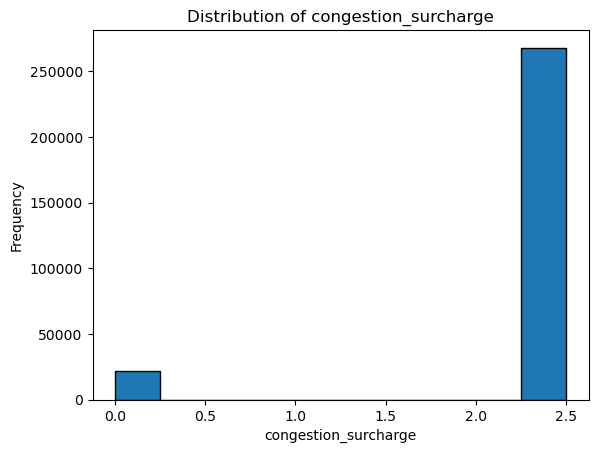

In [36]:
# Plot to find the maximum distribution for congestion_surcharge
plt.hist(df3['congestion_surcharge'].dropna(), bins=10, edgecolor='black')
plt.xlabel('congestion_surcharge')
plt.ylabel('Frequency')
plt.title('Distribution of congestion_surcharge')
plt.show()

In [37]:
# Handling missing values for congestion_surcharge
df3['congestion_surcharge'].fillna(df3['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [38]:
# Handle any remaining missing values

df3.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
store_and_fwd_flag         9972
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
Airport_fee               32830
date                          0
hour                          0
airport_fee              277142
Airport_fee_updated           0
dtype: int64

In [39]:
# Columns airport_fee and Airport_fee are dropped due to high proportion of missing values. 
# New column already introduced Ariport_fee_updated
df3.drop(columns = 'airport_fee', inplace = True)
df3.drop(columns = 'Airport_fee', inplace = True)

In [40]:
df3.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       9972
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
date                        0
hour                        0
Airport_fee_updated         0
dtype: int64

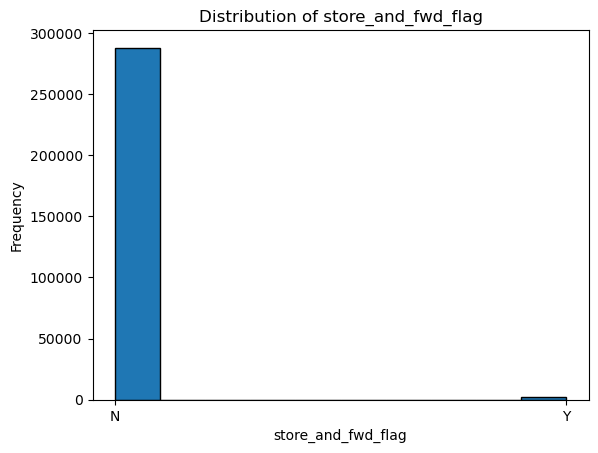

In [41]:
# Plotting histrogram to identify maximum frequency for store_and_fwd_flag
plt.hist(df3['store_and_fwd_flag'].dropna(), bins=10, edgecolor='black')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')
plt.title('Distribution of store_and_fwd_flag')
plt.show()

In [42]:
# Handling missing values for store_and_fwd_flag
df3['store_and_fwd_flag'].fillna(df3['store_and_fwd_flag'].mode()[0], inplace=True)

In [43]:
# No missing values present now in Dataframe df3
df3.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee_updated      0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [44]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df3.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  300000.000000    300000.000000  300000.000000  300000.000000   
mean        1.735637         1.369110       4.432192       1.611447   
std         0.447299         0.860207     261.912989       7.248553   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.430000       1.000000   
max         6.000000         6.000000  126360.460000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      165.413283     164.109853       1.163850      19.944245   
std        63.996640      69.666785       0.505329      18.458556   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.580000   
max       265.000000     265.000000       4.000000     913.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        1.588341       0.495261       3.576096       0.610219   
std         1.832067       0.048585       4.130028       2.206445   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        14.250000       0.800000     231.000000      78.340000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          300000.000000  300000.000000         300000.000000   
mean                0.999004      29.055983              2.316125   
std                 0.028952      23.087769              0.652594   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      31.080000              2.500000   
max                 1.000000     927.750000              2.500000   

                hour  Airport_fee_updated  
count  300000.000000        300000.000000  
mean       14.266373             0.139948  
std         5.798516             0.460233  
min         0.000000             0.000000  
25%        11.000000             0.000000  
50%        15.000000             0.000000  
75%        19.000000             0.000000  
max        23.000000             1.750000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [45]:
# remove passenger_count > 6

df3[df3.passenger_count > 6] # No entries for passenger_count > 6

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_updated]
Index: []

[0 rows x 21 columns]

In [46]:
# Continue with outlier handling
# checking for payment type as 0
df3[df3.payment_type == 0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
29             2  2023-06-02 20:48:17   2023-06-02 20:49:08              1.0   
87             1  2023-10-11 20:51:50   2023-10-11 20:58:01              1.0   
131            2  2023-03-17 16:55:44   2023-03-17 17:45:02              1.0   
148            2  2023-06-30 08:00:44   2023-06-30 08:12:09              1.0   
188            1  2023-04-05 08:43:27   2023-04-05 08:57:06              1.0   
...          ...                  ...                   ...              ...   
299892         1  2023-06-07 10:39:28   2023-06-07 11:11:04              1.0   
299897         2  2023-06-12 14:36:41   2023-06-12 14:49:51              1.0   
299905         2  2023-07-21 16:23:34   2023-07-21 16:36:23              1.0   
299924         1  2023-06-13 19:22:49   2023-06-13 19:33:27              1.0   
299947         1  2023-11-30 22:34:27   2023-11-30 22:47:59              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
29               0.14         1.0                  N           231   
87               0.00         1.0                  N           164   
131              8.05         1.0                  N            37   
148              1.27         1.0                  N           262   
188              1.60         1.0                  N           107   
...               ...         ...                ...           ...   
299892           0.00         1.0                  N           224   
299897           1.78         1.0                  N           114   
299905           2.13         1.0                  N            91   
299924           1.20         1.0                  N           237   
299947           2.50         1.0                  N           114   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
29               231             0  ...    0.0      0.5        2.00   
87               230             0  ...    0.0      0.5        0.00   
131               43             0  ...    0.0      0.5        1.00   
148              237             0  ...    0.0      0.5        3.00   
188              161             0  ...    0.0      0.5        2.73   
...              ...           ...  ...    ...      ...         ...   
299892            40             0  ...    0.0      0.5        0.00   
299897           186             0  ...    0.0      0.5        1.83   
299905           149             0  ...    0.0      0.5        0.61   
299924           233             0  ...    2.5      0.5        1.79   
299947            68             0  ...    1.0      0.5        4.12   

        tolls_amount  improvement_surcharge  total_amount  \
29               0.0                    1.0         39.96   
87               0.0                    1.0         14.79   
131              0.0                    1.0         40.32   
148              0.0                    1.0         18.00   
188              0.0                    1.0         20.93   
...              ...                    ...           ...   
299892           0.0                    1.0         30.67   
299897           0.0                    1.0         20.15   
299905           0.0                    1.0         12.85   
299924           0.0                    1.0         19.69   
299947           0.0                    1.0         24.72   

        congestion_surcharge        date hour  Airport_fee_updated  
29                       2.5  2023-06-02   20                  0.0  
87                       2.5  2023-10-11   20                  0.0  
131                      2.5  2023-03-17   16                  0.0  
148                      2.5  2023-06-30    8                  0.0  
188                      2.5  2023-04-05    8                  0.0  
...                      ...         ...  ...                  ...  
299892                   2.5  2023-06-07   10                  0.0  
299897                   2.5  2023-06-12   14                  0.0  

In [79]:
# check if Payment type is 0 and corresponding tip amount is also 0
df3[(df3.payment_type == 0) & (df3.tip_amount == 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
87             1  2023-10-11 20:51:50   2023-10-11 20:58:01              1.0   
249            1  2023-09-13 08:55:15   2023-09-13 09:08:00              1.0   
296            2  2023-12-10 01:32:00   2023-12-10 01:44:00              1.0   
306            1  2023-10-14 12:06:45   2023-10-14 12:48:39              1.0   
366            1  2023-10-26 21:51:23   2023-10-26 22:14:11              1.0   
...          ...                  ...                   ...              ...   
299272         2  2023-06-13 09:25:31   2023-06-13 09:37:12              1.0   
299369         1  2023-10-13 22:32:36   2023-10-13 22:40:55              1.0   
299588         2  2023-02-03 15:30:00   2023-02-03 15:57:00              1.0   
299812         1  2023-11-20 18:06:11   2023-11-20 18:23:21              1.0   
299892         1  2023-06-07 10:39:28   2023-06-07 11:11:04              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
87               0.00         1.0                  N           164   
249              0.00         1.0                  N           143   
296              3.45         1.0                  N           164   
306              0.00         1.0                  N            17   
366              0.00         1.0                  N           229   
...               ...         ...                ...           ...   
299272           2.76         1.0                  N           231   
299369           0.00         1.0                  N           249   
299588           4.63         1.0                  N            75   
299812           0.00         1.0                  N           236   
299892           0.00         1.0                  N           224   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
87               230             0  ...    0.0      0.5         0.0   
249              161             0  ...    0.0      0.5         0.0   
296              236             0  ...    0.0      0.5         0.0   
306               75             0  ...    0.0      0.5         0.0   
366               87             0  ...    0.0      0.5         0.0   
...              ...           ...  ...    ...      ...         ...   
299272           246             0  ...    0.0      0.5         0.0   
299369           231             0  ...    0.0      0.5         0.0   
299588           244             0  ...    0.0      0.5         0.0   
299812           163             0  ...    0.0      0.5         0.0   
299892            40             0  ...    0.0      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
87              0.00                    1.0         14.79   
249             0.00                    1.0         32.59   
296             0.00                    1.0         23.91   
306             6.94                    1.0         62.53   
366             0.00                    1.0         33.04   
...              ...                    ...           ...   
299272          0.00                    1.0         17.99   
299369          0.00                    1.0         16.85   
299588          0.00                    1.0         25.00   
299812          0.00                    1.0         18.29   
299892          0.00                    1.0         30.67   

        congestion_surcharge        date hour  Airport_fee_updated  
87                       2.5  2023-10-11   20                  0.0  
249                      2.5  2023-09-13    8                  0.0  
296                      2.5  2023-12-10    1                  0.0  
306                      2.5  2023-10-14   12                  0.0  
366                      2.5  2023-10-26   21                  0.0  
...                      ...         ...  ...                  ...  
299272                   2.5  2023-06-13    9                  0.0  
299369                   2.5  2023-10-13   22                  0.0  

In [47]:
# If Tip amount is 0, payment type is set as 2 (Cash)
df3.loc[df3['tip_amount'] == 0, 'payment_type'] = 2

In [48]:
# If Tip amount > 0, payment type is set as 1 (Credit card)
df3.loc[df3['tip_amount'] > 0, 'payment_type'] = 1

In [49]:
# Identify Mode value for RatecodeId
df3.RatecodeID.mode()

0    1.0
Name: RatecodeID, dtype: float64

In [50]:
# Ratecode value counts. Identified with value 99 which is not part of Data Dictionary
df3.RatecodeID.value_counts()

1.0     283531
2.0      11595
99.0      1648
5.0       1626
3.0        971
4.0        628
6.0          1
Name: RatecodeID, dtype: int64

In [51]:
# Handling RatecodeID with value 99. Replacing with value 1.
df3.loc[df3['RatecodeID'] == 99, 'RatecodeID'] = 1

In [52]:
df3.RatecodeID.value_counts()

1.0    285179
2.0     11595
5.0      1626
3.0       971
4.0       628
6.0         1
Name: RatecodeID, dtype: int64

In [53]:
# Entries where trip_distance is more than 250 miles.
df3[df3.trip_distance > 250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
53423          2  2023-09-19 19:36:56   2023-09-19 19:48:16              1.0   
60978          2  2023-05-17 16:43:00   2023-05-17 17:12:00              1.0   
85193          2  2023-05-15 08:46:27   2023-05-15 08:52:23              1.0   
134080         2  2023-12-02 15:41:00   2023-12-02 15:53:00              1.0   
151145         2  2023-05-10 13:56:31   2023-05-10 14:30:23              1.0   
157067         2  2023-05-29 13:13:00   2023-05-29 14:23:00              1.0   
264568         2  2023-10-06 05:20:00   2023-10-06 05:40:00              1.0   
266812         2  2023-10-01 00:05:00   2023-10-01 00:19:00              1.0   
290875         2  2023-06-03 06:23:00   2023-06-03 06:31:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
53423         9674.07         1.0                  N           233   
60978        13035.62         1.0                  N           239   
85193          371.46         1.0                  N           141   
134080       41394.52         1.0                  N           166   
151145        9674.20         1.0                  N           186   
157067      126360.46         1.0                  N           265   
264568       25277.94         1.0                  N            87   
266812       34804.51         1.0                  N           263   
290875       26217.98         1.0                  N           231   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
53423            186             1  ...    2.5      0.5        4.47   
60978            249             1  ...    0.0      0.5        6.13   
85193            140             2  ...    0.0      0.5        0.00   
134080           239             1  ...    0.0      0.5        2.74   
151145            48             2  ...    0.0      0.5        0.00   
157067           132             1  ...    0.0      0.5       20.71   
264568           138             1  ...    0.0      0.5        4.05   
266812           151             1  ...    0.0      0.5        3.69   
290875            68             1  ...    0.0      0.5        2.93   

        tolls_amount  improvement_surcharge  total_amount  \
53423           0.00                    1.0         22.37   
60978           0.00                    1.0         36.80   
85193           0.00                    1.0         11.20   
134080          0.00                    1.0         20.98   
151145          0.00                    1.0         23.10   
157067          6.55                    1.0        114.28   
264568          0.00                    1.0         44.51   
266812          0.00                    1.0         22.14   
290875          0.00                    1.0         17.56   

        congestion_surcharge        date hour  Airport_fee_updated  
53423                    2.5  2023-09-19   19                  0.0  
60978                    2.5  2023-05-17   16                  0.0  
85193                    2.5  2023-05-15    8                  0.0  
134080                   2.5  2023-12-02   15                  0.0  
151145                   2.5  2023-05-10   13                  0.0  
157067                   2.5  2023-05-29   13                  0.0  
264568                   2.5  2023-10-06    5                  0.0  
266812                   2.5  2023-10-01    0                  0.0  
290875                   2.5  2023-06-03    6                  0.0  

[9 rows x 21 columns]

In [54]:
# Entries dropped where trip_distance is more than 250 miles.
df3 = df3[df3['trip_distance'] <= 250]

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299991 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299991 non-null  int64         
 1   tpep_pickup_datetime   299991 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  299991 non-null  datetime64[ns]
 3   passenger_count        299991 non-null  float64       
 4   trip_distance          299991 non-null  float64       
 5   RatecodeID             299991 non-null  float64       
 6   store_and_fwd_flag     299991 non-null  object        
 7   PULocationID           299991 non-null  int64         
 8   DOLocationID           299991 non-null  int64         
 9   payment_type           299991 non-null  int64         
 10  fare_amount            299991 non-null  float64       
 11  extra                  299991 non-null  float64       
 12  mta_tax                299991 non-null  floa

In [56]:
df3.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  299991.000000    299991.000000  299991.000000  299991.000000   
mean        1.735629         1.369121       3.476261       1.073102   
std         0.447303         0.860218       4.581797       0.389745   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.430000       1.000000   
max         6.000000         6.000000     141.710000       6.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  299991.000000  299991.000000  299991.000000  299991.000000   
mean      165.412209     164.110273       1.228387      19.944092   
std        63.996535      69.666909       0.419794      18.458381   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.580000   
max       265.000000     265.000000       2.000000     913.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  299991.000000  299991.000000  299991.000000  299991.000000   
mean        1.588380       0.495261       3.576054       0.610215   
std         1.832076       0.048586       4.129958       2.206449   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        14.250000       0.800000     231.000000      78.340000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          299991.000000  299991.000000         299991.000000   
mean                0.999004      29.055811              2.316119   
std                 0.028952      23.087523              0.652603   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      31.080000              2.500000   
max                 1.000000     927.750000              2.500000   

                hour  Airport_fee_updated  
count  299991.000000        299991.000000  
mean       14.266485             0.139953  
std         5.798481             0.460239  
min         0.000000             0.000000  
25%        11.000000             0.000000  
50%        15.000000             0.000000  
75%        19.000000             0.000000  
max        23.000000             1.750000

In [57]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df3[(df3.trip_distance == 0) & (df3.fare_amount > 300)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
69492          2  2023-03-07 17:28:09   2023-03-07 17:28:20              1.0   
135010         2  2023-11-26 21:57:29   2023-11-26 21:57:37              1.0   
150180         1  2023-02-16 14:57:48   2023-02-16 14:57:48              1.0   
217393         2  2023-06-22 15:58:12   2023-06-22 15:58:38              4.0   
298538         2  2023-09-09 13:31:48   2023-09-09 13:32:00              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
69492             0.0         5.0                  N           100   
135010            0.0         5.0                  N           265   
150180            0.0         1.0                  N           264   
217393            0.0         5.0                  N           100   
298538            0.0         5.0                  N            93   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
69492            100             2  ...    0.0      0.0         0.0   
135010           265             2  ...    0.0      0.0         0.0   
150180           264             2  ...    0.0      0.0         0.0   
217393           100             1  ...    0.0      0.0         5.0   
298538            93             1  ...    0.0      0.0        24.0   

        tolls_amount  improvement_surcharge  total_amount  \
69492            0.0                    1.0         353.5   
135010           0.0                    1.0         501.0   
150180           0.0                    0.0         400.0   
217393           0.0                    1.0         468.5   
298538           0.0                    1.0         400.0   

        congestion_surcharge        date hour  Airport_fee_updated  
69492                    2.5  2023-03-07   17                  0.0  
135010                   0.0  2023-11-26   21                  0.0  
150180                   0.0  2023-02-16   14                  0.0  
217393                   2.5  2023-06-22   15                  0.0  
298538                   0.0  2023-09-09   13                  0.0  

[5 rows x 21 columns]

In [58]:
# Entries were dropped where trip_distance is nearly 0 and fare_amount is more than 300
df3 = df3[~((df3['trip_distance'] == 0) & (df3['fare_amount'] > 300))]


In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299986 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               299986 non-null  int64         
 1   tpep_pickup_datetime   299986 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  299986 non-null  datetime64[ns]
 3   passenger_count        299986 non-null  float64       
 4   trip_distance          299986 non-null  float64       
 5   RatecodeID             299986 non-null  float64       
 6   store_and_fwd_flag     299986 non-null  object        
 7   PULocationID           299986 non-null  int64         
 8   DOLocationID           299986 non-null  int64         
 9   payment_type           299986 non-null  int64         
 10  fare_amount            299986 non-null  float64       
 11  extra                  299986 non-null  float64       
 12  mta_tax                299986 non-null  floa

In [60]:
df3.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  299986.000000    299986.000000  299986.000000  299986.000000   
mean        1.735628         1.369117       3.476319       1.073050   
std         0.447304         0.860211       4.581813       0.389485   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.430000       1.000000   
max         6.000000         6.000000     141.710000       6.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  299986.000000  299986.000000  299986.000000  299986.000000   
mean      165.412226     164.110268       1.228381      19.937474   
std        63.996198      69.666690       0.419790      18.385833   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.570000   
max       265.000000     265.000000       2.000000     913.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  299986.000000  299986.000000  299986.000000  299986.000000   
mean        1.588407       0.495269       3.576017       0.610225   
std         1.832079       0.048544       4.129807       2.206466   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        14.250000       0.800000     231.000000      78.340000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          299986.000000  299986.000000         299986.000000   
mean                0.999007      29.049219              2.316141   
std                 0.028895      23.030156              0.652567   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      31.080000              2.500000   
max                 1.000000     927.750000              2.500000   

                hour  Airport_fee_updated  
count  299986.000000        299986.000000  
mean       14.266456             0.139955  
std         5.798513             0.460243  
min         0.000000             0.000000  
25%        11.000000             0.000000  
50%        15.000000             0.000000  
75%        19.000000             0.000000  
max        23.000000             1.750000

In [61]:
# Do any columns need standardising?

df3.tip_amount.describe()

count    299986.000000
mean          3.576017
std           4.129807
min           0.000000
25%           1.000000
50%           2.850000
75%           4.450000
max         231.000000
Name: tip_amount, dtype: float64

In [62]:
#Entries where tip_amount is more than 100 and total_amount is more than 100
df3[(df3.tip_amount > 100) & (df3.total_amount > 100)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
82605          1  2023-12-04 07:37:33   2023-12-04 08:55:18              1.0   
198209         1  2023-01-25 14:14:07   2023-01-25 14:14:12              2.0   
222233         2  2023-12-07 10:49:50   2023-12-07 10:52:51              1.0   
275818         2  2023-06-30 22:49:09   2023-06-30 23:04:48              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
82605           40.00         5.0                  N            10   
198209           0.00         1.0                  N           265   
222233           0.75         1.0                  N           239   
275818           2.80         1.0                  N           264   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
82605            265             1  ...    0.0      0.0       231.0   
198209           265             1  ...    0.0      0.5       160.0   
222233           151             1  ...    0.0      0.5       110.0   
275818           264             1  ...    1.0      0.5       180.0   

        tolls_amount  improvement_surcharge  total_amount  \
82605            7.0                    1.0         239.0   
198209           0.0                    1.0         164.5   
222233           0.0                    1.0         119.1   
275818           0.0                    1.0         198.8   

        congestion_surcharge        date hour  Airport_fee_updated  
82605                    0.0  2023-12-04    7                  0.0  
198209                   0.0  2023-01-25   14                  0.0  
222233                   2.5  2023-12-07   10                  0.0  
275818                   0.0  2023-06-30   22                  0.0  

[4 rows x 21 columns]

In [63]:
#Entries were dropped where tip_amount is more than 100 and total_amount is more than 100
df3 = df3[~((df3['tip_amount'] >100) & (df3['total_amount'] > 100))]

In [64]:
df3.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  299982.000000    299982.000000  299982.000000  299982.000000   
mean        1.735631         1.369119       3.476220       1.073038   
std         0.447302         0.860215       4.581351       0.389421   
min         1.000000         1.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.430000       1.000000   
max         6.000000         6.000000     141.710000       6.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  299982.000000  299982.000000  299982.000000  299982.000000   
mean      165.411838     164.109307       1.228384      19.937658   
std        63.995343      69.666424       0.419792      18.385872   
min         1.000000       1.000000       1.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      22.570000   
max       265.000000     265.000000       2.000000     913.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  299982.000000  299982.000000  299982.000000  299982.000000   
mean        1.588425       0.495271       3.573794       0.610210   
std         1.832085       0.048536       4.081671       2.206449   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        14.250000       0.800000     100.000000      78.340000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          299982.000000  299982.000000         299982.000000   
mean                0.999007      29.047201              2.316164   
std                 0.028895      23.023118              0.652530   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      31.080000              2.500000   
max                 1.000000     927.750000              2.500000   

                hour  Airport_fee_updated  
count  299982.000000        299982.000000  
mean       14.266469             0.139957  
std         5.798514             0.460245  
min         0.000000             0.000000  
25%        11.000000             0.000000  
50%        15.000000             0.000000  
75%        19.000000             0.000000  
max        23.000000             1.750000

In [65]:
df3.passenger_count.value_counts()

1.0    233172
2.0     43923
3.0     10509
4.0      6179
5.0      3744
6.0      2455
Name: passenger_count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? Numerical


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [66]:
# Find and show the hourly trends in taxi pickups
hourly_trends = df3.groupby('hour').size()
print(hourly_trends)


hour
0      8408
1      5595
2      3653
3      2540
4      1717
5      1773
6      4126
7      8242
8     11455
9     12986
10    13932
11    15176
12    16298
13    17025
14    18037
15    18598
16    18503
17    20228
18    21108
19    18886
20    16828
21    16924
22    15557
23    12387
dtype: int64


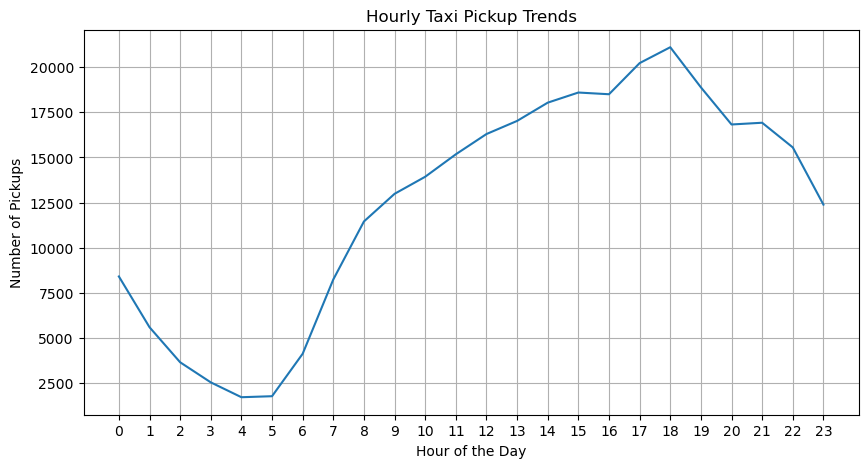

In [67]:
# Plot to show Hourly Taxi Pickup Trends
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Taxi Pickup Trends")
plt.xticks(range(0, 24))  
plt.grid()
plt.show()

In [68]:
# Find and show the daily trends in taxi pickups (days of the week)
df3['day_of_week'] = df3['tpep_pickup_datetime'].dt.day_name()


In [69]:
#day_trends = df3.groupby('day_of_week').size()
#print(day_trends)

day_trends = df3['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
print(day_trends)

Monday       37826
Tuesday      43521
Wednesday    45787
Thursday     46914
Friday       44392
Saturday     43594
Sunday       37948
Name: day_of_week, dtype: int64


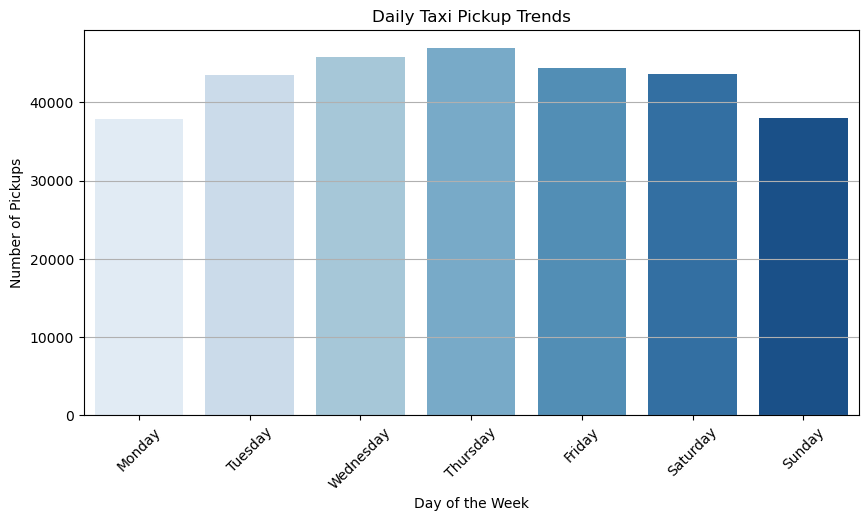

In [70]:
# Plot to show Daily Taxi Pickup Trends
plt.figure(figsize=(10,5))
sns.barplot(x=day_trends.index, y=day_trends.values, palette="Blues")

plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Taxi Pickup Trends")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [71]:
# Show the monthly trends in pickups
df3['month'] = df3['tpep_pickup_datetime'].dt.month_name()


In [72]:
#month_trends = df3.groupby('month').size()
#print(month_trends)

monthly_trends = df3['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
print(monthly_trends)

January      23405
February     21451
March        30040
April        25915
May          31772
June         24842
July         23721
August       21535
September    20754
October      26828
November     23962
December     25757
Name: month, dtype: int64


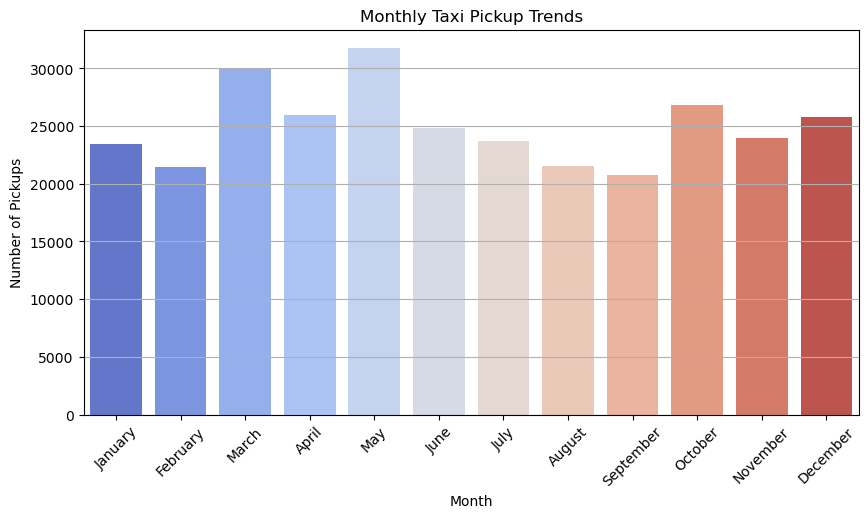

In [73]:
# Plot for Monthly Taxi Pickup Trends
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Taxi Pickup Trends")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [74]:
# Analyse the above parameters
# Identifying negative values in fare amount
df3[df3.fare_amount < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_updated, day_of_week, month]
Index: []

[0 rows x 23 columns]

In [75]:
# Identifying zero values in fare amount
df3[df3.fare_amount == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6180           1  2023-03-03 12:13:56   2023-03-03 12:15:45              1.0   
6978           2  2023-09-25 00:12:38   2023-09-25 01:07:42              1.0   
9224           1  2023-11-24 18:19:43   2023-11-24 18:50:18              1.0   
10147          2  2023-07-03 14:46:17   2023-07-03 15:03:59              1.0   
11634          1  2023-03-16 12:27:20   2023-03-16 12:27:29              1.0   
...          ...                  ...                   ...              ...   
284019         1  2023-12-20 05:04:00   2023-12-20 05:35:14              1.0   
290449         2  2023-05-12 19:10:08   2023-05-12 19:22:16              3.0   
291454         1  2023-02-06 11:23:17   2023-02-06 11:23:20              1.0   
291720         1  2023-09-05 10:50:00   2023-09-05 11:24:55              1.0   
299179         1  2023-03-06 23:40:42   2023-03-06 23:40:42              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
6180             0.00         1.0                  N           170   
6978            24.18         4.0                  N           138   
9224            16.20         5.0                  N           246   
10147            2.58         1.0                  N           163   
11634            0.00         5.0                  N           132   
...               ...         ...                ...           ...   
284019           0.00         1.0                  N            98   
290449           0.84         1.0                  N           113   
291454           0.00         1.0                  N           162   
291720           9.60         5.0                  N           161   
299179           0.00         5.0                  N           138   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
6180             137             2  ...        0.00          0.00   
6978             265             2  ...        0.00          0.00   
9224             265             1  ...        3.15         14.75   
10147            238             2  ...        0.00          0.00   
11634            132             2  ...        0.00          0.00   
...              ...           ...  ...         ...           ...   
284019           232             2  ...        0.00          0.00   
290449            79             2  ...        0.00          0.00   
291454           162             2  ...        0.00          0.00   
291720           138             2  ...        0.00          0.00   
299179           264             2  ...        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
6180                      0.0          0.00                   0.0  2023-03-03   
6978                      1.0          3.25                   0.0  2023-09-25   
9224                      1.0         18.90                   0.0  2023-11-24   
10147                     1.0          4.00                   2.5  2023-07-03   
11634                     1.0          2.25                   0.0  2023-03-16   
...                       ...           ...                   ...         ...   
284019                    0.0          0.00                   0.0  2023-12-20   
290449                    1.0          4.00                   2.5  2023-05-12   
291454                    0.0          0.00                   0.0  2023-02-06   
291720                    1.0          6.00                   0.0  2023-09-05   
299179                    1.0          2.25                   0.0  2023-03-06   

        hour  Airport_fee_updated day_of_week      month  
6180      12                 0.00      Friday      March  
6978       0                 1.75      Monday  September  
9224      18                 0.00      Friday   November  
10147     14                 0.00      Monday       July  
11634     12                 1.25    Thursday      March  
...      ...                  ...         ...     

In [137]:
# Identifying zero values in tip amount
df3[df3.tip_amount == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2              2  2023-08-27 12:55:43   2023-08-27 13:05:38              5.0   
4              2  2023-11-08 12:55:11   2023-11-08 13:11:10              1.0   
9              2  2023-02-25 12:45:04   2023-02-25 13:27:35              2.0   
10             2  2023-09-08 13:28:11   2023-09-08 13:52:19              2.0   
19             2  2023-04-10 12:04:00   2023-04-10 12:10:32              2.0   
...          ...                  ...                   ...              ...   
299970         1  2023-03-21 14:41:07   2023-03-21 14:42:46              1.0   
299972         2  2023-04-10 17:00:00   2023-04-10 17:05:28              1.0   
299976         2  2023-11-30 18:02:32   2023-11-30 18:26:03              1.0   
299985         1  2023-08-07 19:12:52   2023-08-07 19:13:56              1.0   
299999         2  2023-05-08 09:56:43   2023-05-08 10:11:06              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2                2.32         1.0                  N           239   
4                1.72         1.0                  N           164   
9               22.73         2.0                  N           132   
10               2.56         1.0                  N           170   
19               1.08         1.0                  N           140   
...               ...         ...                ...           ...   
299970           0.10         1.0                  N           166   
299972           0.95         1.0                  N           142   
299976           1.51         1.0                  N           249   
299985           0.00         2.0                  N           141   
299999           1.74         1.0                  N           162   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
2                 48             2  ...         0.0           0.0   
4                141             2  ...         0.0           0.0   
9                261             2  ...         0.0           0.0   
10               142             2  ...         0.0           0.0   
19               229             2  ...         0.0           0.0   
...              ...           ...  ...         ...           ...   
299970           166             2  ...         0.0           0.0   
299972           163             2  ...         0.0           0.0   
299976           230             2  ...         0.0           0.0   
299985           141             2  ...         0.0           0.0   
299999            90             2  ...         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
2                         1.0          16.8                   2.5  2023-08-27   
4                         1.0          18.9                   2.5  2023-11-08   
9                         1.0          74.0                   2.5  2023-02-25   
10                        1.0          25.2                   2.5  2023-09-08   
19                        1.0          13.3                   2.5  2023-04-10   
...                       ...           ...                   ...         ...   
299970                    1.0           4.5                   0.0  2023-03-21   
299972                    1.0          14.4                   2.5  2023-04-10   
299976                    1.0          26.3                   2.5  2023-11-30   
299985                    1.0          79.0                   2.5  2023-08-07   
299999                    1.0          18.2                   2.5  2023-05-08   

        hour  Airport_fee_updated day_of_week      month  
2         12                  0.0      Sunday     August  
4         12                  0.0   Wednesday   November  
9         12                  0.0    Saturday   February  
10        13                  0.0      Friday  September  
19        12                  0.0      Monday      April  
...      ...                  ...         ...     

In [76]:
# Identifying negative values in tip amount
df3[df3.tip_amount <0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_updated, day_of_week, month]
Index: []

[0 rows x 23 columns]

In [77]:
# Identifying zero values in Total amount
df3[df3.total_amount ==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6180           1  2023-03-03 12:13:56   2023-03-03 12:15:45              1.0   
12038          1  2023-06-15 21:16:07   2023-06-15 21:16:07              1.0   
17251          1  2023-11-29 21:31:35   2023-11-29 21:32:34              1.0   
27556          2  2023-02-02 13:42:54   2023-02-02 13:43:11              1.0   
32415          2  2023-05-22 22:25:20   2023-05-22 22:25:26              1.0   
35103          1  2023-10-24 13:34:13   2023-10-24 14:26:55              1.0   
37038          1  2023-11-30 10:37:05   2023-11-30 11:47:18              1.0   
44658          2  2023-02-24 21:16:26   2023-02-25 21:14:44              1.0   
47331          1  2023-12-04 23:52:21   2023-12-04 23:53:50              1.0   
50336          1  2023-02-05 06:39:02   2023-02-05 06:39:20              1.0   
57041          1  2023-02-06 14:09:48   2023-02-06 14:10:32              2.0   
60872          1  2023-07-21 18:45:23   2023-07-21 18:46:05              1.0   
67455          2  2023-05-02 22:08:58   2023-05-02 22:09:14              1.0   
69736          2  2023-01-18 19:07:31   2023-01-18 19:07:44              1.0   
79050          2  2023-01-29 13:20:02   2023-01-29 13:20:25              1.0   
106006         1  2023-05-02 21:01:26   2023-05-02 21:03:04              1.0   
115385         1  2023-05-09 12:59:13   2023-05-09 12:59:24              1.0   
122836         1  2023-04-03 11:44:41   2023-04-03 11:45:09              1.0   
124445         2  2023-10-19 13:05:26   2023-10-19 13:06:35              1.0   
130941         1  2023-11-30 20:05:00   2023-11-30 20:06:36              1.0   
134415         1  2023-08-27 15:11:47   2023-08-27 15:12:13              1.0   
135192         1  2023-03-28 22:42:45   2023-03-28 22:52:28              1.0   
138525         1  2023-03-07 18:28:37   2023-03-07 18:32:35              1.0   
144320         2  2023-03-05 09:29:54   2023-03-05 09:30:06              1.0   
148437         2  2023-03-29 19:58:34   2023-03-29 19:58:45              1.0   
151538         1  2023-03-22 17:02:17   2023-03-22 17:03:03              2.0   
159943         1  2023-04-12 10:04:54   2023-04-12 10:50:47              1.0   
162751         1  2023-10-15 23:21:15   2023-10-15 23:22:08              1.0   
164796         1  2023-03-23 16:42:46   2023-03-23 16:42:54              1.0   
182494         1  2023-05-01 22:33:50   2023-05-01 22:34:21              1.0   
182931         1  2023-04-16 12:05:50   2023-04-16 12:08:06              1.0   
186671         1  2023-04-07 00:30:21   2023-04-07 00:30:21              1.0   
202772         2  2023-09-05 20:39:27   2023-09-05 20:40:11              1.0   
208983         2  2023-09-19 14:11:05   2023-09-19 14:11:47              1.0   
214920         2  2023-10-26 22:03:18   2023-10-26 22:03:20              1.0   
215541         1  2023-09-14 16:28:01   2023-09-14 16:30:12              1.0   
235724         1  2023-10-23 17:38:15   2023-10-23 17:38:46              1.0   
236665         2  2023-10-03 14:47:09   2023-10-03 14:47:15              1.0   
237224         2  2023-01-18 12:53:34   2023-01-18 12:53:40              1.0   
247993         1  2023-11-15 12:49:08   2023-11-15 12:49:39              1.0   
260136         1  2023-02-05 06:39:02   2023-02-05 06:39:20              1.0   
272471         1  2023-08-14 15:19:16   2023-08-14 15:19:16              1.0   
284019         1  2023-12-20 05:04:00   2023-12-20 05:35:14              1.0   
291454         1  2023-02-06 11:23:17   2023-02-06 11:23:20              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
6180              0.0         1.0                  N           170   
12038             0.0         5.0                  Y           161   
17251             3.3         1.0                  N           158   
27556             0.0         1.0                  N           193   
32415             0.0         1.0                  N     

In [78]:
#Identifying negative values in total amount
df3[df3.total_amount <0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_updated, day_of_week, month]
Index: []

[0 rows x 23 columns]

In [79]:
#Identifying negative values in trip distance
df3[df3.trip_distance <0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee_updated, day_of_week, month]
Index: []

[0 rows x 23 columns]

In [80]:
# Identifying zero values in trip distance
df3[df3.trip_distance == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38             2  2023-12-09 16:39:35   2023-12-09 16:44:56              1.0   
59             2  2023-06-19 23:44:14   2023-06-19 23:44:19              1.0   
65             2  2023-09-04 11:41:09   2023-09-04 11:41:19              4.0   
87             1  2023-10-11 20:51:50   2023-10-11 20:58:01              1.0   
186            2  2023-12-06 22:19:44   2023-12-06 22:19:49              2.0   
...          ...                  ...                   ...              ...   
299602         2  2023-08-15 22:55:55   2023-08-15 22:56:04              3.0   
299812         1  2023-11-20 18:06:11   2023-11-20 18:23:21              1.0   
299892         1  2023-06-07 10:39:28   2023-06-07 11:11:04              1.0   
299920         2  2023-06-25 01:09:09   2023-06-25 01:09:28              1.0   
299985         1  2023-08-07 19:12:52   2023-08-07 19:13:56              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
38                0.0         1.0                  N           236   
59                0.0         1.0                  N           265   
65                0.0         5.0                  N           164   
87                0.0         1.0                  N           164   
186               0.0         5.0                  N           231   
...               ...         ...                ...           ...   
299602            0.0         5.0                  N           264   
299812            0.0         1.0                  N           236   
299892            0.0         1.0                  N           224   
299920            0.0         5.0                  N            48   
299985            0.0         2.0                  N           141   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
38               262             1  ...         1.5           0.0   
59               265             1  ...        18.0           0.0   
65               164             1  ...        17.3           0.0   
87               230             2  ...         0.0           0.0   
186              231             2  ...         0.0           0.0   
...              ...           ...  ...         ...           ...   
299602           264             1  ...        10.0           0.0   
299812           163             2  ...         0.0           0.0   
299892            40             2  ...         0.0           0.0   
299920            48             2  ...         0.0           0.0   
299985           141             2  ...         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
38                        1.0         12.00                   2.5  2023-12-09   
59                        1.0         23.50                   0.0  2023-06-19   
65                        1.0        103.80                   2.5  2023-09-04   
87                        1.0         14.79                   2.5  2023-10-11   
186                       1.0         28.50                   2.5  2023-12-06   
...                       ...           ...                   ...         ...   
299602                    1.0        100.00                   0.0  2023-08-15   
299812                    1.0         18.29                   2.5  2023-11-20   
299892                    1.0         30.67                   2.5  2023-06-07   
299920                    1.0         16.05                   2.5  2023-06-25   
299985                    1.0         79.00                   2.5  2023-08-07   

        hour  Airport_fee_updated day_of_week      month  
38        16                  0.0    Saturday   December  
59        23                  0.0      Monday       June  
65        11                  0.0      Monday  September  
87        20                  0.0   Wednesday    October  
186       22                  0.0   Wednesday   December  
...      ...                  ...         ...     

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [81]:
# Create a df with non zero entries for the selected parameters.
df3 = df3[~(df3['tip_amount'] == 0)]


In [82]:
# Dropping fare amount entries with zero values
df3 = df3[~(df3['fare_amount'] == 0)]

In [83]:
# Dropping total amount entries with zero values
df3 = df3[~(df3['total_amount'] == 0)]

In [84]:
# Identifying zero values for trip distance where Pickup location is not same as Drop location
df3[(df3['trip_distance'] == 0) & (df3['PULocationID'] != df3['DOLocationID'])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38             2  2023-12-09 16:39:35   2023-12-09 16:44:56              1.0   
1321           2  2023-10-22 02:18:25   2023-10-22 02:30:30              1.0   
2529           2  2023-06-12 13:36:37   2023-06-12 13:36:45              1.0   
2973           2  2023-07-24 18:57:21   2023-07-24 18:57:45              4.0   
3063           2  2023-10-16 12:09:49   2023-10-16 12:39:55              1.0   
...          ...                  ...                   ...              ...   
296604         2  2023-01-01 23:14:50   2023-01-01 23:24:42              1.0   
297077         1  2023-09-13 20:23:13   2023-09-13 20:49:25              1.0   
297082         2  2023-05-25 19:46:35   2023-05-25 20:21:11              2.0   
298698         2  2023-04-11 14:59:46   2023-04-11 15:40:07              1.0   
298738         2  2023-08-10 17:09:21   2023-08-10 17:28:40              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
38                0.0         1.0                  N           236   
1321              0.0         1.0                  N           246   
2529              0.0         5.0                  N            88   
2973              0.0         5.0                  N           161   
3063              0.0         1.0                  N           163   
...               ...         ...                ...           ...   
296604            0.0         1.0                  N            79   
297077            0.0         1.0                  N           211   
297082            0.0         2.0                  N           132   
298698            0.0         1.0                  N           138   
298738            0.0         1.0                  N           142   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
38               262             1  ...        1.50          0.00   
1321             161             1  ...        3.28          0.00   
2529              87             1  ...       21.45          0.00   
2973             230             1  ...        4.00          0.00   
3063             261             1  ...        5.60          0.00   
...              ...           ...  ...         ...           ...   
296604           186             1  ...        2.86          0.00   
297077           229             1  ...        3.45          0.00   
297082            79             1  ...       17.11          6.55   
298698            68             1  ...       12.08          6.55   
298738           263             1  ...        2.28          0.00   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
38                        1.0         12.00                   2.5  2023-12-09   
1321                      1.0         19.68                   2.5  2023-10-22   
2529                      1.0        107.25                   2.5  2023-06-12   
2973                      1.0         24.00                   2.5  2023-07-24   
3063                      1.0         33.60                   2.5  2023-10-16   
...                       ...           ...                   ...         ...   
296604                    1.0         17.16                   2.5  2023-01-01   
297077                    1.0         28.45                   2.5  2023-09-13   
297082                    1.0        104.41                   2.5  2023-05-25   
298698                    1.0         60.38                   2.5  2023-04-11   
298738                    1.0         25.08                   2.5  2023-08-10   

        hour  Airport_fee_updated day_of_week      month  
38        16                 0.00    Saturday   December  
1321       2                 0.00      Sunday    October  
2529      13                 0.00      Monday       June  
2973      18                 0.00      Monday       July  
3063      12                 0.00      Monday    October  
...      ...                  ...         ...     

In [85]:
# Dropping entries for zero values for trip distance where Pickup location is not same as Drop location
df3 = df3[~((df3['trip_distance'] == 0) & (df3['PULocationID'] != df3['DOLocationID']))]

In [86]:
df3[df3.trip_distance == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
59             2  2023-06-19 23:44:14   2023-06-19 23:44:19              1.0   
65             2  2023-09-04 11:41:09   2023-09-04 11:41:19              4.0   
991            2  2023-07-31 21:11:46   2023-07-31 21:11:52              1.0   
1039           2  2023-05-03 22:32:29   2023-05-03 22:54:00              1.0   
1310           2  2023-10-10 15:38:10   2023-10-10 16:47:40              1.0   
...          ...                  ...                   ...              ...   
298399         2  2023-10-24 17:49:20   2023-10-24 17:49:25              4.0   
298530         2  2023-05-05 03:15:25   2023-05-05 03:15:31              1.0   
299087         2  2023-05-07 03:10:15   2023-05-07 03:10:49              4.0   
299408         2  2023-07-13 16:08:47   2023-07-13 16:08:52              1.0   
299602         2  2023-08-15 22:55:55   2023-08-15 22:56:04              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
59                0.0         1.0                  N           265   
65                0.0         5.0                  N           164   
991               0.0         5.0                  N           265   
1039              0.0         1.0                  N           264   
1310              0.0         2.0                  N           264   
...               ...         ...                ...           ...   
298399            0.0         5.0                  N           132   
298530            0.0         5.0                  N           144   
299087            0.0         5.0                  N           256   
299408            0.0         5.0                  N           264   
299602            0.0         5.0                  N           264   

        DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
59               265             1  ...       18.00          0.00   
65               164             1  ...       17.30          0.00   
991              265             1  ...       10.00          0.00   
1039             264             1  ...        5.67          0.00   
1310             264             1  ...       16.19          6.94   
...              ...           ...  ...         ...           ...   
298399           132             1  ...        5.00          0.00   
298530           144             1  ...        2.70          0.00   
299087           256             1  ...        7.80          0.00   
299408           264             1  ...        5.00          0.00   
299602           264             1  ...       10.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge        date  \
59                        1.0         23.50                   0.0  2023-06-19   
65                        1.0        103.80                   2.5  2023-09-04   
991                       1.0         79.50                   0.0  2023-07-31   
1039                      1.0         28.37                   2.5  2023-05-03   
1310                      1.0         98.88                   2.5  2023-10-10   
...                       ...           ...                   ...         ...   
298399                    1.0         93.75                   0.0  2023-10-24   
298530                    1.0         16.20                   2.5  2023-05-05   
299087                    1.0         46.80                   0.0  2023-05-07   
299408                    1.0         92.25                   0.0  2023-07-13   
299602                    1.0        100.00                   0.0  2023-08-15   

        hour  Airport_fee_updated day_of_week      month  
59        23                 0.00      Monday       June  
65        11                 0.00      Monday  September  
991       21                 0.00      Monday       July  
1039      22                 0.00   Wednesday        May  
1310      15                 1.75     Tuesday    October  
...      ...                  ...         ...     

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [87]:
# Group data by month and analyse monthly revenue

monthly_revenue = df3.groupby('month')['total_amount'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

print(monthly_revenue)

month
January      514623.07
February     474906.54
March        687956.05
April        589703.07
May          751989.39
June         583605.89
July         540607.93
August       484040.09
September    499681.59
October      630603.16
November     559485.99
December     585462.57
Name: total_amount, dtype: float64


In [157]:
# Plot for Monthly Revenue Trends
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Monthly Revenue")
plt.title("Monthly Revenue Trends")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [88]:
# Calculate proportion of each quarter
df3['quarter'] = df3['tpep_pickup_datetime'].dt.to_period('Q')


In [89]:
# Grouping of Total amount quarter wise
quarterly_revenue = df3.groupby('quarter')['total_amount'].sum()

print(quarterly_revenue)

quarter
2023Q1    1677485.66
2023Q2    1925298.35
2023Q3    1524329.61
2023Q4    1775551.72
Freq: Q-DEC, Name: total_amount, dtype: float64


In [90]:
# Plot for Quarterly Revenue Trends
plt.figure(figsize=(10,5))
sns.barplot(x=quarterly_revenue.index, y=quarterly_revenue.values, palette="coolwarm")

plt.xlabel("Quarter")
plt.ylabel("Quarterly Revenue")
plt.title("Quarterly Revenue Trends")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [91]:
quarterly_revenue_perc = (quarterly_revenue / quarterly_revenue.sum()) * 100
print(quarterly_revenue_perc)


quarter
2023Q1    24.301999
2023Q2    27.892100
2023Q3    22.083203
2023Q4    25.722697
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [92]:
# Plot for Trip Distance Vs Fare amount
plt.figure(figsize=(8,5))
sns.regplot(x=df3['trip_distance'], y=df3['fare_amount'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs. Fare Amount (with Regression Line)")
plt.grid(True)
plt.show()

In [93]:
# Identifying correlation between Trip distance and Fare amount
correlation = df3[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.2f}")


Correlation between Trip Distance and Fare Amount: 0.93


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [94]:
# Show relationship between fare and trip duration
# Calculate trip duration in minutes
df3['trip_duration'] = (df3['tpep_dropoff_datetime'] - df3['tpep_pickup_datetime']).dt.total_seconds() / 60  



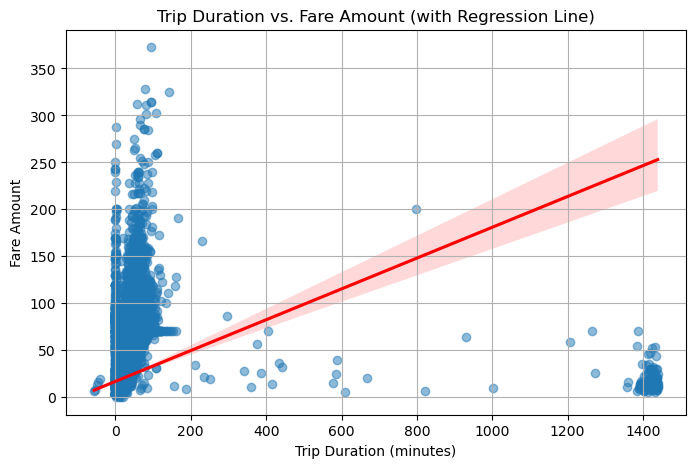

In [95]:
# Plot for Trip Duration and Fare amount
plt.figure(figsize=(8,5))
sns.regplot(x=df3['trip_duration'], y=df3['fare_amount'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.title("Trip Duration vs. Fare Amount (with Regression Line)")
plt.grid(True)
plt.show()

In [96]:
#Identifying correlation between trip duration, fare amount
trip_duration_correlation = df3[['trip_duration', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between Trip Duration and Fare Amount: {trip_duration_correlation:.2f}")

Correlation between Trip Duration and Fare Amount: 0.32


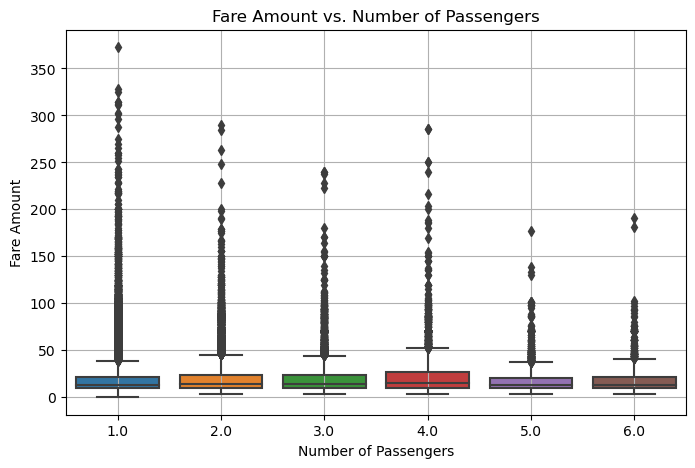

In [97]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8,5))
sns.boxplot(x=df3['passenger_count'], y=df3['fare_amount'])

plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount")
plt.title("Fare Amount vs. Number of Passengers")
plt.grid(True)
plt.show()


In [98]:
# Identifying correlation between Passenger count and fare amount
passenger_count_correlation = df3[['passenger_count', 'fare_amount']].corr().iloc[0, 1]
print(f"Correlation between Passenger count and Fare Amount: {passenger_count_correlation:.2f}")

Correlation between Passenger count and Fare Amount: 0.04


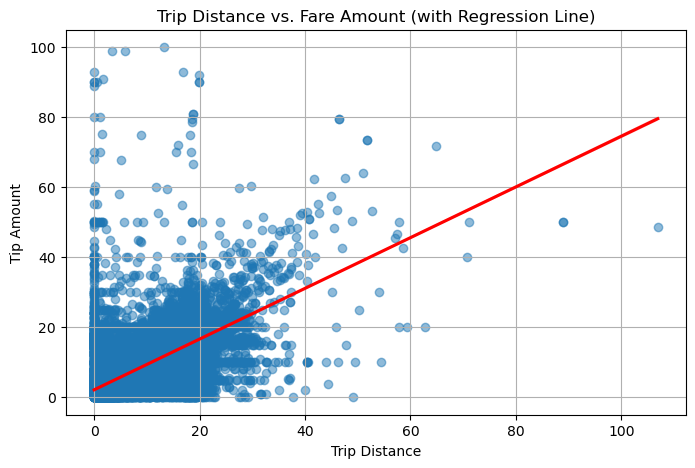

In [99]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8,5))
sns.regplot(x=df3['trip_distance'], y=df3['tip_amount'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.title("Trip Distance vs. Fare Amount (with Regression Line)")
plt.grid(True)
plt.show()

In [100]:
# Identifying correlation between trip distance and tip amount
tip_amount_correlation = df3[['trip_distance', 'tip_amount']].corr().iloc[0, 1]
print(f"Correlation between Trip distance and Tip Amount: {tip_amount_correlation:.2f}")

Correlation between Trip distance and Tip Amount: 0.79


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

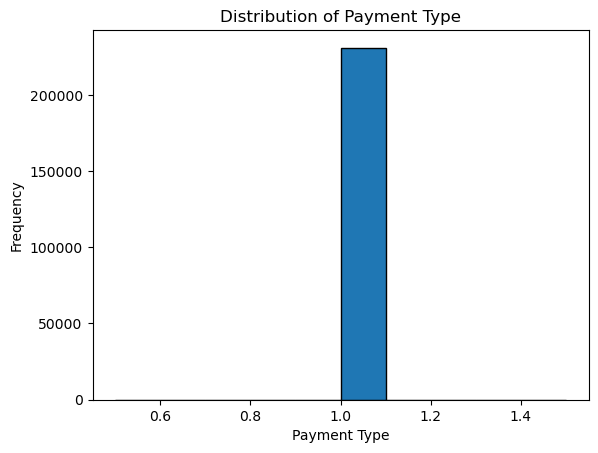

In [101]:
# Analyse the distribution of different payment types (payment_type).

plt.hist(df3['payment_type'], edgecolor='black')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Type')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [102]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/tejasbokare/Documents/NYC Taxi Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [103]:
print(zones.info())
# zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

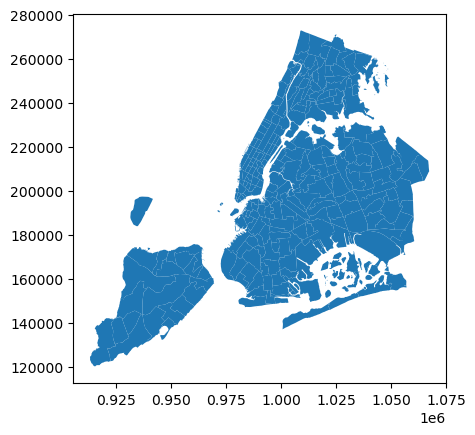

In [104]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [105]:
# Merge zones and trip records using locationID and PULocationID
# New Dataframe created df5 for the merge
df5 = df3.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')



In [106]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230894 entries, 0 to 230893
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               230894 non-null  int64         
 1   tpep_pickup_datetime   230894 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  230894 non-null  datetime64[ns]
 3   passenger_count        230894 non-null  float64       
 4   trip_distance          230894 non-null  float64       
 5   RatecodeID             230894 non-null  float64       
 6   store_and_fwd_flag     230894 non-null  object        
 7   PULocationID           230894 non-null  int64         
 8   DOLocationID           230894 non-null  int64         
 9   payment_type           230894 non-null  int64         
 10  fare_amount            230894 non-null  float64       
 11  extra                  230894 non-null  float64       
 12  mta_tax                230894 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [107]:
# Group data by location and calculate the number of trips
trip_count_1 = df5.groupby('LocationID').size().reset_index(name='trip_count')
print(trip_count_1)





     LocationID  trip_count
0           1.0          20
1           4.0         257
2           7.0          54
3           8.0           2
4          10.0          51
..          ...         ...
178       257.0           1
179       260.0          15
180       261.0        1090
181       262.0        3243
182       263.0        4508

[183 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [108]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trip_count_1, left_on='LocationID', right_on='LocationID', how='left')






In [109]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        20.0  
1         NaN  
2         NaN  
3       257.0  
4         NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

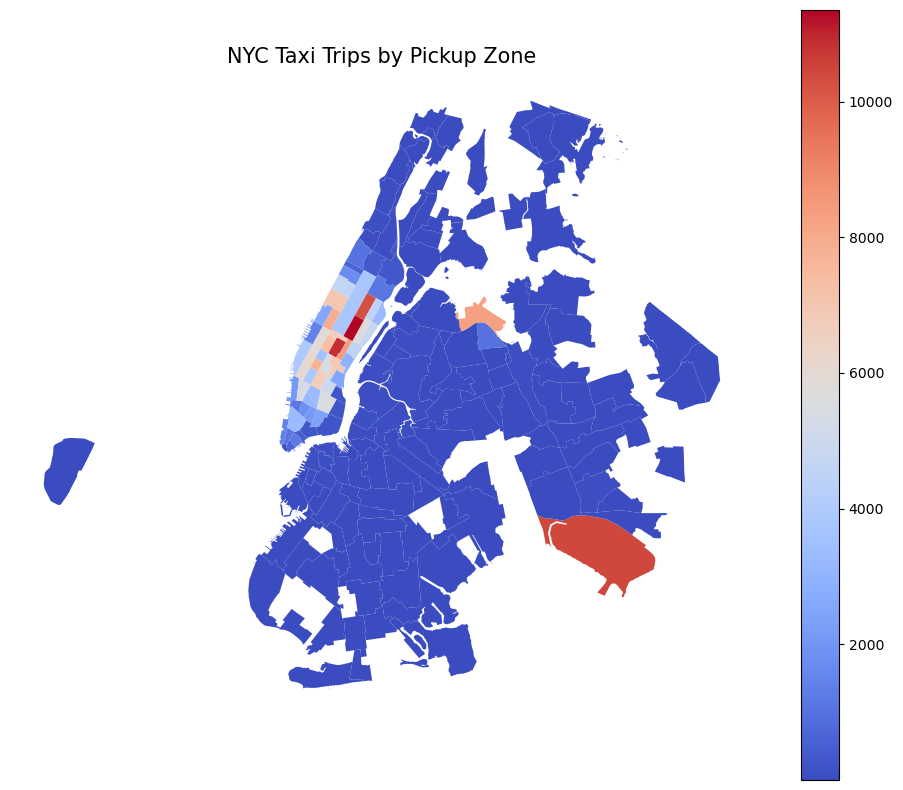

In [110]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones.plot(column="trip_count", cmap="coolwarm", linewidth=0.8, legend=True, ax=ax)

ax.set_title("NYC Taxi Trips by Pickup Zone", fontsize=15)
ax.axis("off") 
plt.show()


In [111]:
# can you try displaying the zones DF sorted by the number of trips?


zones_sorted = zones.sort_values(by="trip_count", ascending=False)

# Display the top 10 zones
zones_sorted.head(10)



OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
131       132    0.245479    0.002038                   JFK Airport   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
238       239    0.063626    0.000205         Upper West Side South   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
238         239  Manhattan  POLYGON ((991168.979 226252.992, 991955.565 22...   

     trip_count  
236     11350.0  
160     10852.0  
131     10420.0  
235     10242.0  
161      8398.0  
137      8294.0  
141      7896.0  
185      7755.0  
229      7306.0  
238      7006.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [125]:
# Find routes which have the slowest speeds at different times of the day

df5["trip_duration"] = df3["trip_duration"] / 60 # For converting minutes to hours


In [126]:
df5["trip_duration"] = df5["trip_duration"].abs() # For correcting negative values in trip_duration

In [127]:
# Grouping of Pickup ID, Dropoff ID, pickup hour to find average duration and average distance
route_speed = df5.groupby(["PULocationID", "DOLocationID", "hour"]).agg(
    avg_duration=("trip_duration", "mean"),  
    avg_distance=("trip_distance", "mean") 
).reset_index()

In [128]:
# Replace 0 with NaN
route_speed["avg_duration"] = route_speed["avg_duration"].replace(0, np.nan)

In [129]:
# Calculation of average speed
route_speed["avg_speed"] = route_speed["avg_distance"] / route_speed["avg_duration"]

In [130]:
route_speed = route_speed.dropna()

In [131]:
# Sorting routes with slowest avg speed
slow_routes = route_speed.sort_values(by="avg_speed", ascending=True)

In [132]:
slow_routes.head(10)

PULocationID  DOLocationID  hour  avg_duration  avg_distance  avg_speed
0                 1             1     5      0.191389           0.0        0.0
2749             45            45    13      0.550000           0.0        0.0
10693            90            90    23      0.380741           0.0        0.0
10677            90            90     7      0.859722           0.0        0.0
28612           151           151     4      0.102500           0.0        0.0
28611           151           151     2      0.901111           0.0        0.0
16013           116           116     2      0.158611           0.0        0.0
16019           116           116    21      0.312917           0.0        0.0
272              10            10    18      0.404722           0.0        0.0
2754             45            45    23      0.603611           0.0        0.0

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.


In [136]:
# Visualise the number of trips per hour and find the busiest hour

#calculating number of trips per hour
number_of_trips = df5.groupby('hour')['hour'].count().reset_index(name ='trip_count')

In [139]:
number_of_trips.loc[number_of_trips['trip_count'].idxmax()] #busiest hour and number of trips

hour             18
trip_count    16816
Name: 18, dtype: int64

In [140]:
number_of_trips.head()

hour  trip_count
0     0        6537
1     1        4296
2     2        2675
3     3        1838
4     4        1131

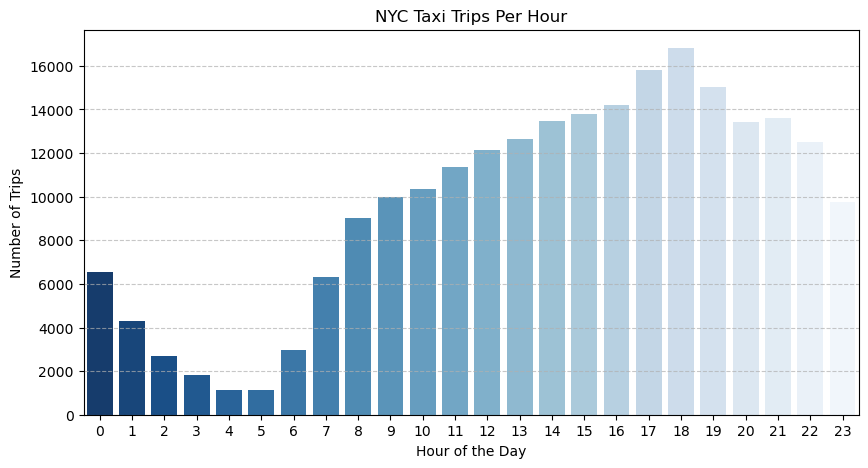

In [141]:
# Plotting Taxi Trips Per hour
plt.figure(figsize=(10, 5))
sns.barplot(x=number_of_trips["hour"], y=number_of_trips["trip_count"], palette="Blues_r")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Trips Per Hour")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [143]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

number_of_trips["actual_trip_count"] = number_of_trips["trip_count"] / sample_fraction



In [145]:
# Calculating 5 busiest hours
busiest_hours = number_of_trips.nlargest(5, "trip_count")

In [146]:
busiest_hours

hour  trip_count  actual_trip_count
18    18       16816           336320.0
17    17       15810           316200.0
19    19       15041           300820.0
16    16       14226           284520.0
15    15       13791           275820.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [151]:
# Compare traffic trends for the week days and weekends

df5["pickup_day"] = df5["tpep_pickup_datetime"].dt.dayofweek  

# Define weekday vs weekend
df5["day_type"] = df5["pickup_day"].apply(lambda x: "Weekday" if x < 5 else "Weekend")


In [160]:
# Grouping of Traffic trends by pickup hour and day type
traffic_trends = df5.groupby(['hour','day_type'])['hour'].count().reset_index(name='trip_count')

In [161]:
traffic_trends

hour day_type  trip_count
0      0  Weekday        3138
1      0  Weekend        3399
2      1  Weekday        1549
3      1  Weekend        2747
4      2  Weekday         809
5      2  Weekend        1866
6      3  Weekday         465
7      3  Weekend        1373
8      4  Weekday         474
9      4  Weekend         657
10     5  Weekday         889
11     5  Weekend         248
12     6  Weekday        2533
13     6  Weekend         429
14     7  Weekday        5652
15     7  Weekend         678
16     8  Weekday        7826
17     8  Weekend        1213
18     9  Weekday        8082
19     9  Weekend        1903
20    10  Weekday        7841
21    10  Weekend        2529
22    11  Weekday        8247
23    11  Weekend        3110
24    12  Weekday        8648
25    12  Weekend        3489
26    13  Weekday        9034
27    13  Weekend        3633
28    14  Weekday        9835
29    14  Weekend        3618
30    15  Weekday       10154
31    15  Weekend        3637
32    16  Weekday       10424
33    16  Weekend        3802
34    17  Weekday       11884
35    17  Weekend        3926
36    18  Weekday       12918
37    18  Weekend        3898
38    19  Weekday       11548
39    19  Weekend        3493
40    20  Weekday       10277
41    20  Weekend        3160
42    21  Weekday       10490
43    21  Weekend        3099
44    22  Weekday        9451
45    22  Weekend        3074
46    23  Weekday        6923
47    23  Weekend        2822

In [163]:
# Plotting hourly traffic pattern on weekdays and weekend
plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_trends, x="hour", y="trip_count", hue="day_type", marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xticks(range(0, 24))  
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Day Type")

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [173]:
# Find top 10 pickup and dropoff zones

# Grouping of pickup trend based on pickup hour and pickup location
pickup_trend = df5.groupby(['hour','PULocationID'])['hour'].count().reset_index(name='pickup_count')

In [174]:
pickup_trend.head()

hour  PULocationID  pickup_count
0     0             4            24
1     0             7             1
2     0            12             1
3     0            13             3
4     0            24             6

In [167]:
# calculating the top 10 pickup zones
top_pickup_zone = pickup_trend.nlargest(10, "pickup_count")

In [168]:
top_pickup_zone

hour  PULocationID  pickup_count
1763    18           161          1031
1658    17           161           930
1859    19           161           883
1789    18           237           876
1472    15           236           865
1372    14           237           863
1473    15           237           862
1687    17           237           855
1580    16           237           811
1553    16           161           795

In [177]:
dropoff_trend = df5.groupby(['hour','DOLocationID'])['hour'].count().reset_index(name='dropoff_count')

In [178]:
dropoff_trend.head()

hour  DOLocationID  dropoff_count
0     0             1              3
1     0             4             59
2     0             7             60
3     0             9              3
4     0            10             14

In [179]:
# calculating the top 10 dropoff zones
top_dropoff_zone = dropoff_trend.nlargest(10, "dropoff_count")

In [180]:
top_dropoff_zone

hour  DOLocationID  dropoff_count
3018    18           237            829
2292    14           236            815
3017    18           236            810
2465    15           236            795
2826    17           236            793
2466    15           237            774
2827    17           237            761
2645    16           236            760
2121    13           237            750
2293    14           237            745

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [182]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Merging of Pickup trend and dropoff trend
zone_ratios = pickup_trend.merge(dropoff_trend, left_on="PULocationID", right_on="DOLocationID", how="outer").fillna(0)


In [186]:
zone_ratios[zone_ratios['dropoff_count'] == 0]

Empty DataFrame
Columns: [hour_x, PULocationID, pickup_count, hour_y, DOLocationID, dropoff_count]
Index: []

In [187]:
# Calculating zone ratios 
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickup_count"] / zone_ratios["dropoff_count"]


In [188]:
zone_ratios.head()

hour_x  PULocationID  pickup_count  hour_y  DOLocationID  dropoff_count  \
0     0.0           4.0          24.0       0             4             59   
1     0.0           4.0          24.0       1             4             33   
2     0.0           4.0          24.0       2             4             30   
3     0.0           4.0          24.0       3             4             24   
4     0.0           4.0          24.0       4             4              9   

   pickup_drop_ratio  
0           0.406780  
1           0.727273  
2           0.800000  
3           1.000000  
4           2.666667

In [190]:
# 10 highest (pickup/drop) ratios
top_10_zones = zone_ratios.nlargest(10, "pickup_drop_ratio")
top_10_zones

hour_x  PULocationID  pickup_count  hour_y  DOLocationID  \
18750    14.0         138.0         621.0       0           138   
18751    14.0         138.0         621.0       1           138   
18798    16.0         138.0         581.0       0           138   
18799    16.0         138.0         581.0       1           138   
18774    15.0         138.0         539.0       0           138   
18775    15.0         138.0         539.0       1           138   
18726    13.0         138.0         534.0       0           138   
18727    13.0         138.0         534.0       1           138   
18918    21.0         138.0         528.0       0           138   
18919    21.0         138.0         528.0       1           138   

       dropoff_count  pickup_drop_ratio  
18750              1              621.0  
18751              1              621.0  
18798              1              581.0  
18799              1              581.0  
18774              1              539.0  
18775              1              539.0  
18726              1              534.0  
18727              1              534.0  
18918              1              528.0  
18919              1              528.0

In [191]:
#10 lowest (pickup/drop) ratios
bottom_10_zones = zone_ratios.nsmallest(10, "pickup_drop_ratio")
bottom_10_zones

hour_x  PULocationID  pickup_count  hour_y  DOLocationID  \
52310     0.0           0.0           0.0       0             9   
52311     0.0           0.0           0.0       7             9   
52312     0.0           0.0           0.0       8             9   
52313     0.0           0.0           0.0      10             9   
52314     0.0           0.0           0.0      12             9   
52315     0.0           0.0           0.0      14             9   
52316     0.0           0.0           0.0      16             9   
52317     0.0           0.0           0.0      17             9   
52318     0.0           0.0           0.0      18             9   
52319     0.0           0.0           0.0      19             9   

       dropoff_count  pickup_drop_ratio  
52310              3                0.0  
52311              1                0.0  
52312              1                0.0  
52313              1                0.0  
52314              1                0.0  
52315              1                0.0  
52316              1                0.0  
52317              3                0.0  
52318              1                0.0  
52319              4                0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [192]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


# Setting filter for night trips
night_trips = df5[(df5["hour"] >= 23) | (df5["hour"] <= 5)]



In [193]:
# zones with high pickup traffic during night hours
top_night_pickups = (
    night_trips.groupby("PULocationID")["PULocationID"]
    .count()
    .reset_index(name="night_pickup_count")
    .nlargest(10, "night_pickup_count")
)

In [194]:
top_night_pickups

PULocationID  night_pickup_count
36             79                2108
118           249                1697
57            132                1525
69            148                1310
21             48                1285
50            114                1163
106           230                 980
87            186                 868
61            138                 815
110           234                 781

In [195]:
#zones with high dropoff traffic during night hours
top_night_dropoffs = (
    night_trips.groupby("DOLocationID")["DOLocationID"]
    .count()
    .reset_index(name="night_dropoff_count")
    .nlargest(10, "night_dropoff_count")
)

top_night_dropoffs

DOLocationID  night_dropoff_count
66             79                 1043
38             48                  871
144           170                  795
87            107                  765
228           263                  720
117           141                  709
55             68                  706
215           249                  680
202           236                  634
205           239                  632

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [196]:
# Filter for night hours (11 PM to 5 AM)

df5["time_category"] = df5["hour"].apply(lambda x: "Night" if x >= 22 or x <= 5 else "Day")



In [199]:
# Grouping of total fare amount by time category
revenue_share = df5.groupby("time_category")["fare_amount"].sum().reset_index()

In [200]:
revenue_share.head()

time_category  fare_amount
0           Day   3732633.62
1         Night    800833.82

In [201]:
total_revenue = revenue_share["fare_amount"].sum()


In [203]:
#Calculation revenue share percentage
revenue_share["revenue_percentage"] = (revenue_share["fare_amount"] / total_revenue) * 100


In [206]:
revenue_share

time_category  fare_amount  revenue_percentage
0           Day   3732633.62           82.335071
1         Night    800833.82           17.664929

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [211]:
# Analyse the fare per mile per passenger for different passenger counts

# create new data frame for trip distance >0
fare_per_passenger = df5[df5['trip_distance'] > 0]


In [212]:
# calculation of fare per mile per passenger
fare_per_passenger['fare_per_mile_passenger'] = fare_per_passenger['fare_amount']/(fare_per_passenger['trip_distance']*fare_per_passenger['passenger_count'])

In [215]:
# Fare analysis based on passenger count and fare per mile per passenger
fare_analysis = fare_per_passenger.groupby("passenger_count")["fare_per_mile_passenger"].agg(["mean", "median", "count"]).reset_index()

fare_analysis



passenger_count      mean    median   count
0              1.0  9.064200  7.133333  180184
1              2.0  5.410548  3.475610   33175
2              3.0  2.882835  2.366539    7676
3              4.0  3.027573  1.737288    4069
4              5.0  1.569403  1.410536    2972
5              6.0  1.273068  1.194642    1920

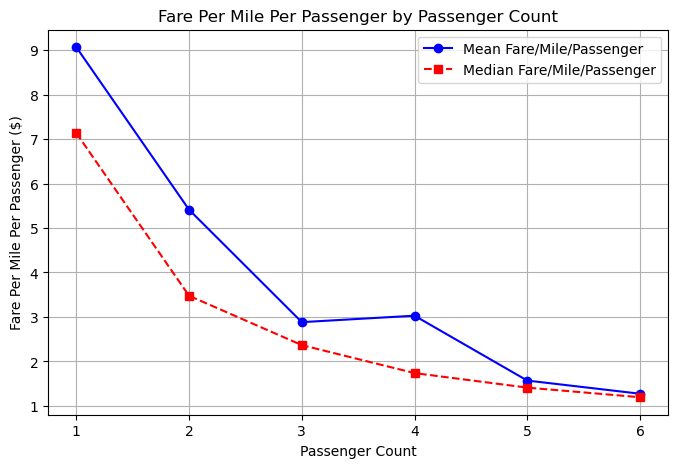

In [216]:
# Plotting of the fare analysis
plt.figure(figsize=(8, 5))
plt.plot(fare_analysis["passenger_count"], fare_analysis["mean"], marker="o", linestyle="-", label="Mean Fare/Mile/Passenger", color="blue")
plt.plot(fare_analysis["passenger_count"], fare_analysis["median"], marker="s", linestyle="--", label="Median Fare/Mile/Passenger", color="red")

plt.xlabel("Passenger Count")
plt.ylabel("Fare Per Mile Per Passenger")
plt.title("Fare Per Mile Per Passenger by Passenger Count")
plt.legend()
plt.grid(True)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [221]:
# Compare the average fare per mile for different days and for different times of the day

# Calculatin of fare per mile
fare_per_passenger["fare_per_mile"] = fare_per_passenger["fare_amount"] / fare_per_passenger["trip_distance"]

In [236]:
# calculation of avg fare per mile by hours of the day
avg_fare_hours = fare_per_passenger.groupby(['hour'])['fare_per_mile'].mean().reset_index()

In [237]:
avg_fare_hours

hour  fare_per_mile
0      0       8.340000
1      1       7.244883
2      2       9.172121
3      3       6.872475
4      4      16.318355
5      5       8.848239
6      6      12.242092
7      7       8.876361
8      8       9.887131
9      9       9.564913
10    10       9.151031
11    11       9.092745
12    12       9.152946
13    13      10.864312
14    14       9.217205
15    15      11.109848
16    16      11.626682
17    17       9.240376
18    18      10.159980
19    19       8.844176
20    20       8.146819
21    21       7.203069
22    22       7.708648
23    23       8.441562

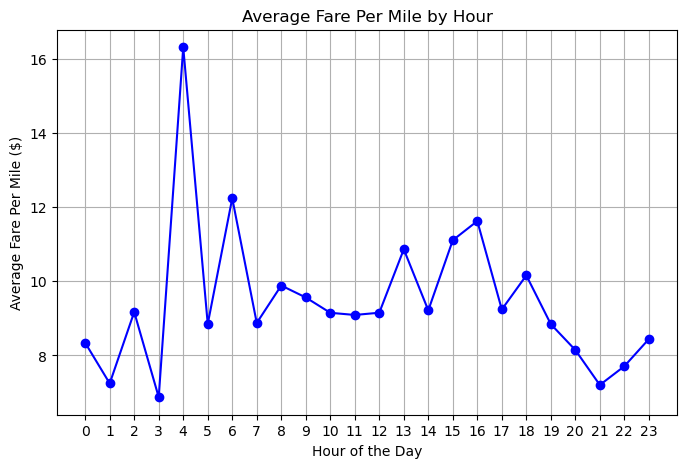

In [238]:
# Plotting of avg fare per mile by hours of the day
plt.figure(figsize=(8, 5))
plt.plot(avg_fare_hours["hour"], avg_fare_hours["fare_per_mile"], marker="o", linestyle="-", color="blue")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Average Fare Per Mile by Hour")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [244]:
# Calculation of avg fare per mile by days of the week
avg_fare_days = fare_per_passenger.groupby(['day_of_week'])['fare_per_mile'].mean().reset_index()

In [252]:
avg_fare_days = avg_fare_days.sort_values("day_of_week")

In [253]:
avg_fare_days

day_of_week  fare_per_mile
0      Friday       8.491529
1      Monday       8.811352
2    Saturday       9.208506
3      Sunday       9.607251
4    Thursday       9.723079
5     Tuesday       9.131265
6   Wednesday      10.210655

In [251]:
# Plotting of avg fare per mile by days of the week
plt.figure(figsize=(8, 5))
plt.plot(avg_fare_days["day_of_week"], avg_fare_days["fare_per_mile"],marker="o", linestyle="-", color="blue")

plt.xlabel("Day")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Average Fare Per Mile by Day of Week")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [217]:
fare_per_passenger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229996 entries, 0 to 230893
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VendorID                 229996 non-null  int64         
 1   tpep_pickup_datetime     229996 non-null  datetime64[ns]
 2   tpep_dropoff_datetime    229996 non-null  datetime64[ns]
 3   passenger_count          229996 non-null  float64       
 4   trip_distance            229996 non-null  float64       
 5   RatecodeID               229996 non-null  float64       
 6   store_and_fwd_flag       229996 non-null  object        
 7   PULocationID             229996 non-null  int64         
 8   DOLocationID             229996 non-null  int64         
 9   payment_type             229996 non-null  int64         
 10  fare_amount              229996 non-null  float64       
 11  extra                    229996 non-null  float64       
 12  mta_tax         

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [254]:
# Compare fare per mile for different vendors
vendor_fare_per_mile = fare_per_passenger.groupby("VendorID")["fare_per_mile"].mean().reset_index()


In [259]:
#Plotting fare per mile for different vendors
plt.figure(figsize=(6, 4))
plt.bar(vendor_fare_per_mile["VendorID"], vendor_fare_per_mile["fare_per_mile"], color=["blue", "orange"])

plt.xlabel("Vendor ID")
plt.ylabel("Average Fare Per Mile ($)")
plt.title("Comparison of Fare Per Mile by Vendor")
plt.xticks(vendor_fare_per_mile["VendorID"])
plt.grid(axis="y")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [262]:
# Defining distance tiers

bins = [0, 2, 5, float("inf")]
labels = ["Short (≤2 miles)", "Medium (2-5 miles)", "Long (>5 miles)"]


fare_per_passenger["distance_category"] = pd.cut(fare_per_passenger["trip_distance"], bins=bins, labels=labels, right=True)


In [263]:
# Calculation of tiered analysis based on distance tiers
tiered_analysis = fare_per_passenger.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()

In [265]:
tiered_analysis

VendorID   distance_category  fare_per_mile
0         1    Short (≤2 miles)       9.515767
1         1  Medium (2-5 miles)       6.357391
2         1     Long (>5 miles)       4.477806
3         2    Short (≤2 miles)      13.343022
4         2  Medium (2-5 miles)       6.527445
5         2     Long (>5 miles)       4.491303

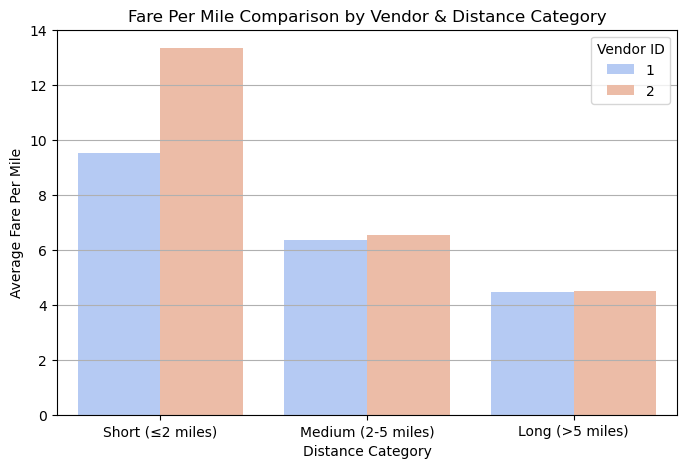

In [264]:
# Plotting of the tiered analysis
plt.figure(figsize=(8, 5))
sns.barplot(x="distance_category", y="fare_per_mile", hue="VendorID", data=tiered_analysis, palette="coolwarm")

plt.xlabel("Distance Category")
plt.ylabel("Average Fare Per Mile")
plt.title("Fare Per Mile Comparison by Vendor & Distance Category")
plt.legend(title="Vendor ID")
plt.grid(axis="y")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [267]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculating of tip percentage
fare_per_passenger["tip_percentage"] = (fare_per_passenger["tip_amount"] / fare_per_passenger["total_amount"]) * 100


In [268]:
# Grouping of average tip percentages based on trip distances (using distance category)
tip_distance = fare_per_passenger.groupby("distance_category")["tip_percentage"].mean().reset_index()

In [269]:
tip_distance

distance_category  tip_percentage
0    Short (≤2 miles)       15.602391
1  Medium (2-5 miles)       15.110691
2     Long (>5 miles)       15.106590

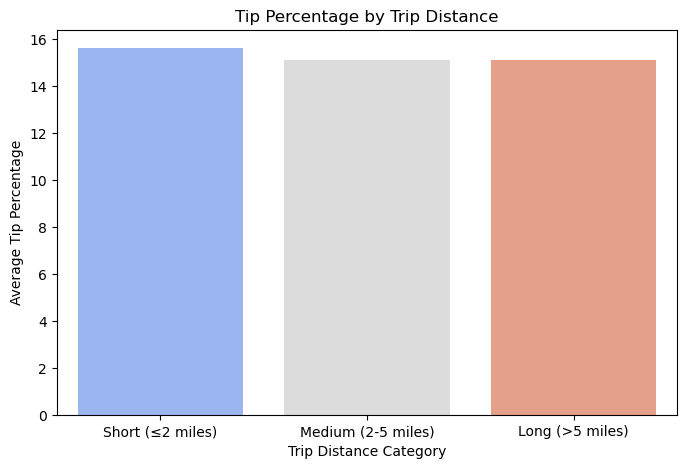

In [270]:
#Plotting of tip percentage by trip distance
plt.figure(figsize=(8, 5))
sns.barplot(x="distance_category", y="tip_percentage", data=tip_distance, palette="coolwarm")

plt.xlabel("Trip Distance Category")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Trip Distance")
plt.show()

In [271]:
# Grouping of average tip percentages based on passenger counts
tip_passenger = fare_per_passenger.groupby("passenger_count")["tip_percentage"].mean().reset_index()

In [272]:
tip_passenger

passenger_count  tip_percentage
0              1.0       15.363785
1              2.0       15.423846
2              3.0       15.406348
3              4.0       15.630195
4              5.0       15.376525
5              6.0       15.375732

In [273]:
#Plotting Tip percentage by number of Passengers
plt.figure(figsize=(8, 5))
sns.barplot(x="passenger_count", y="tip_percentage", data=tip_passenger, palette="coolwarm")

plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Number of Passengers")
plt.show()

In [274]:
# Grouping of average tip percentages based on pickup hour
tip_hour = fare_per_passenger.groupby("hour")["tip_percentage"].mean().reset_index()

In [276]:
tip_hour

hour  tip_percentage
0      0       15.263713
1      1       15.070101
2      2       15.110075
3      3       15.202488
4      4       15.415980
5      5       15.038095
6      6       14.877092
7      7       15.122305
8      8       15.260460
9      9       15.487168
10    10       15.552372
11    11       15.652473
12    12       15.636393
13    13       15.660661
14    14       15.610505
15    15       15.519219
16    16       15.326700
17    17       15.261159
18    18       15.280067
19    19       15.144543
20    20       15.398533
21    21       15.374491
22    22       15.346574
23    23       15.160155

In [275]:
#Plotting tip percentage by Pickup hour
plt.figure(figsize=(10, 5))
sns.lineplot(x="hour", y="tip_percentage", data=tip_hour, marker="o", color="red")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Pickup Hour")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [277]:
# See how passenger count varies across hours and days

# Grouping of Passenger cound based on hour
passenger_count_hour = fare_per_passenger.groupby("hour")["passenger_count"].mean().reset_index()


In [278]:
passenger_count_hour

hour  passenger_count
0      0         1.396305
1      1         1.394366
2      2         1.402338
3      3         1.424092
4      4         1.358102
5      5         1.271594
6      6         1.230639
7      7         1.250871
8      8         1.262240
9      9         1.287379
10    10         1.335816
11    11         1.347719
12    12         1.357226
13    13         1.347857
14    14         1.369666
15    15         1.382432
16    16         1.371929
17    17         1.355093
18    18         1.344967
19    19         1.358572
20    20         1.377678
21    21         1.404045
22    22         1.416333
23    23         1.398205

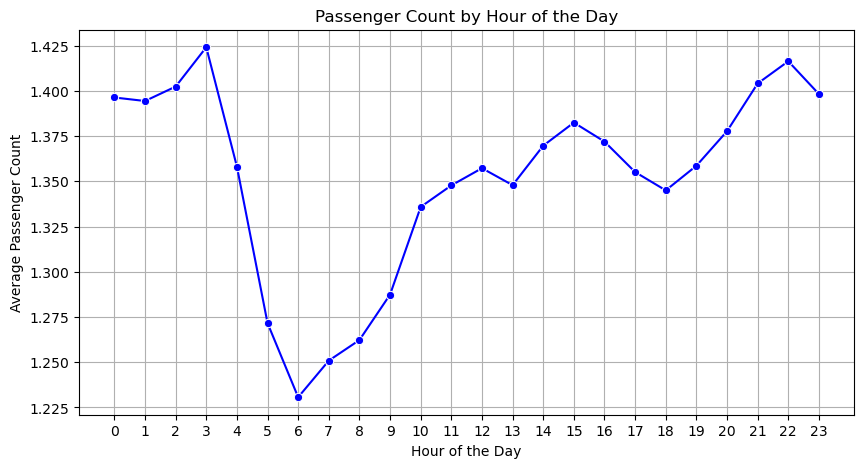

In [279]:
#Plotting Passenger count by hour of the day
plt.figure(figsize=(10, 5))
sns.lineplot(x="hour", y="passenger_count", data=passenger_count_hour, marker="o", color="blue")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [281]:

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fare_per_passenger["day_of_week"] = pd.Categorical(fare_per_passenger["day_of_week"], categories=day_order, ordered=True)

# Group by day of the week and find the average passenger count
passenger_count_day = fare_per_passenger.groupby("day_of_week")["passenger_count"].mean().reset_index()


In [282]:
passenger_count_day

day_of_week  passenger_count
0      Monday         1.333531
1     Tuesday         1.301943
2   Wednesday         1.313578
3    Thursday         1.307119
4      Friday         1.374922
5    Saturday         1.456766
6      Sunday         1.431488

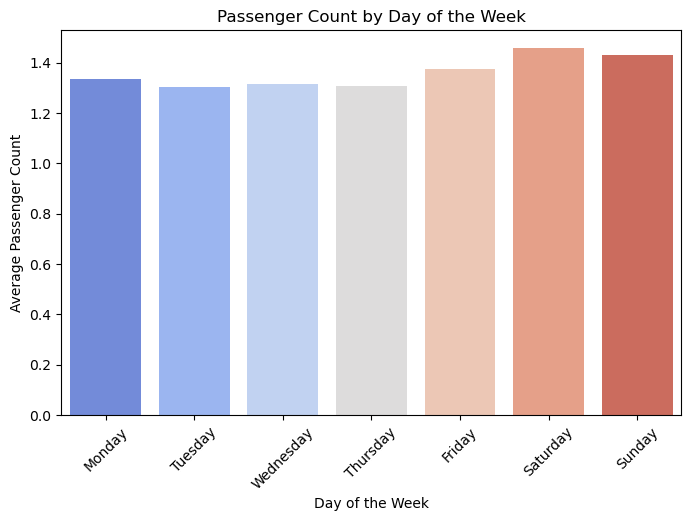

In [283]:
#Plotting Passenger count by the Day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x="day_of_week", y="passenger_count", data=passenger_count_day, palette="coolwarm")

plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Passenger Count by Day of the Week")
plt.xticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [284]:
# How does passenger count vary across zones
passenger_count_zone = fare_per_passenger.groupby("PULocationID")["passenger_count"].mean().reset_index()


In [285]:
passenger_count_zone

PULocationID  passenger_count
0               1         1.400000
1               4         1.299611
2               7         1.137255
3               8         1.500000
4              10         1.460000
..            ...              ...
175           261         1.469613
176           262         1.288183
177           263         1.317566
178           264         1.317073
179           265         1.535714

[180 rows x 2 columns]

In [286]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_2 = zones.merge(passenger_count_zone, left_on='LocationID', right_on='PULocationID')

In [287]:
zones_2.head()

OBJECTID  Shape_Leng  Shape_Area            zone  LocationID    borough  \
0         1    0.116357    0.000782  Newark Airport           1        EWR   
1         4    0.043567    0.000112   Alphabet City           4  Manhattan   
2         7    0.107417    0.000390         Astoria           7     Queens   
3         8    0.027591    0.000027    Astoria Park           8     Queens   
4        10    0.099839    0.000436    Baisley Park          10     Queens   

                                            geometry  trip_count  \
0  POLYGON ((933100.918 192536.086, 933091.011 19...        20.0   
1  POLYGON ((992073.467 203714.076, 992068.667 20...       257.0   
2  POLYGON ((1010804.218 218919.641, 1011049.165 ...        54.0   
3  POLYGON ((1005482.276 221686.466, 1005304.898 ...         2.0   
4  POLYGON ((1044355.072 190734.321, 1044612.122 ...        51.0   

   PULocationID  passenger_count  
0             1         1.400000  
1             4         1.299611  
2             7         1.137255  
3             8         1.500000  
4            10         1.460000

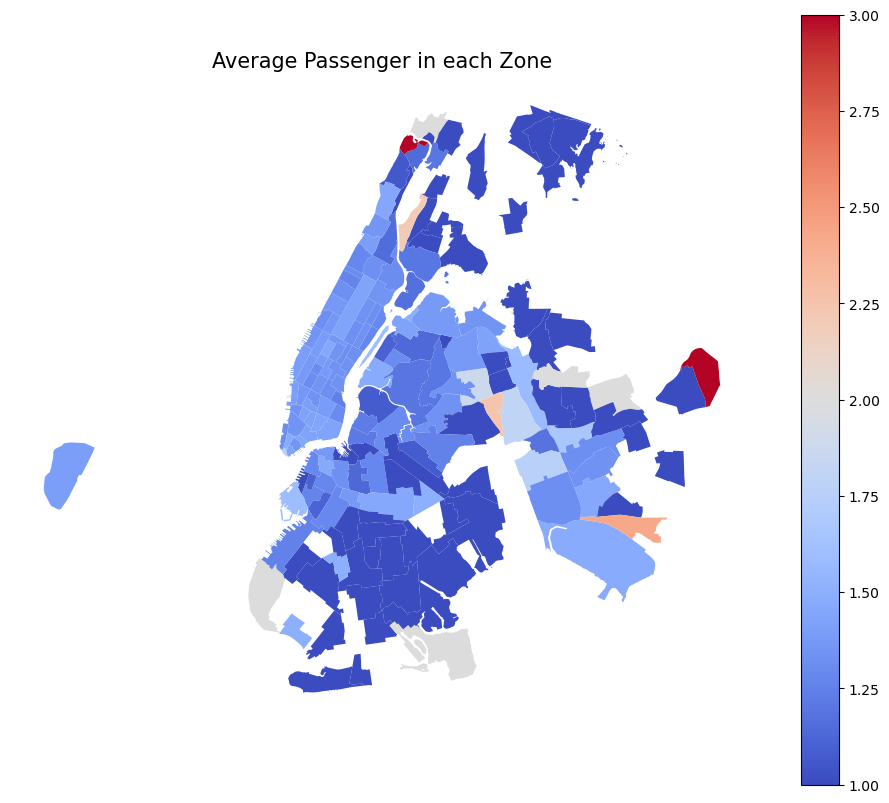

In [288]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it

zones_2.plot(column="passenger_count", cmap="coolwarm", linewidth=0.8, legend=True, ax=ax)

ax.set_title("Average Passenger in each Zone", fontsize=15)
ax.axis("off") 
plt.show()


In [289]:
passenger_by_zone = zones_2.groupby("zone")["passenger_count"].mean().reset_index()

In [290]:
passenger_by_zone

zone  passenger_count
0         Alphabet City         1.299611
1               Astoria         1.137255
2          Astoria Park         1.500000
3          Baisley Park         1.460000
4            Bath Beach         1.500000
..                  ...              ...
173     Windsor Terrace         1.000000
174            Woodside         1.200000
175  World Trade Center         1.469613
176      Yorkville East         1.288183
177      Yorkville West         1.317566

[178 rows x 2 columns]

In [291]:
bottom_passenger_zones = passenger_by_zone.nsmallest(10, "passenger_count")

In [292]:
bottom_passenger_zones

zone  passenger_count
9            Bellerose              1.0
10    Bensonhurst East              1.0
13        Borough Park              1.0
15      Brighton Beach              1.0
16          Bronx Park              1.0
18  Brooklyn Navy Yard              1.0
20      Bushwick South              1.0
21     Cambria Heights              1.0
22            Canarsie              1.0
31          Co-Op City              1.0

In [293]:
top_passenger_zones = passenger_by_zone.nlargest(10, "passenger_count")

In [294]:
top_passenger_zones

zone  passenger_count
68                         Glen Oaks         3.000000
81                  Inwood Hill Park         3.000000
146        Springfield Gardens South         2.428571
135                        Rego Park         2.250000
168                   West Concourse         2.200000
7                          Bay Ridge         2.000000
66                     Fresh Meadows         2.000000
104  Marine Park/Floyd Bennett Field         2.000000
131                  Queensboro Hill         2.000000
147       Spuyten Duyvil/Kingsbridge         2.000000

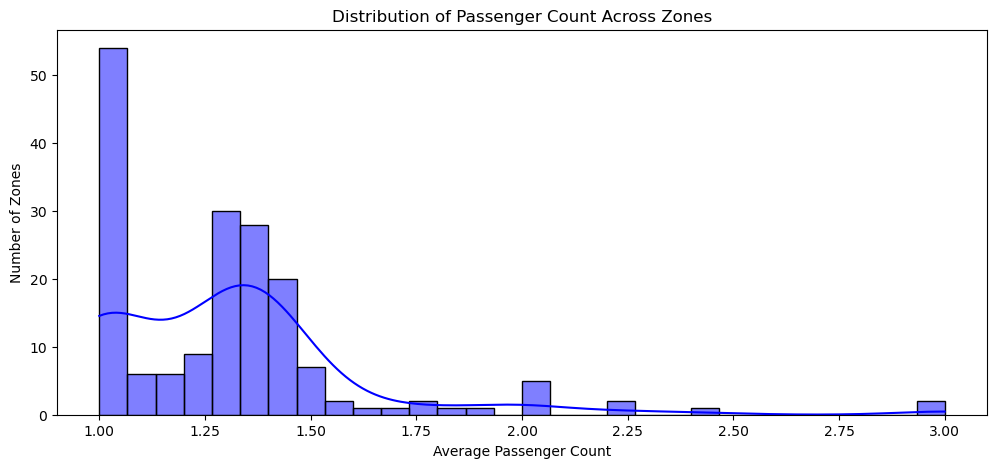

In [295]:
# Plotting distribution of Passenger count across zones
plt.figure(figsize=(12, 5))
sns.histplot(passenger_by_zone["passenger_count"], bins=30, kde=True, color="blue")

plt.xlabel("Average Passenger Count")
plt.ylabel("Number of Zones")
plt.title("Distribution of Passenger Count Across Zones")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [297]:
# How often is each surcharge applied?

# Grouping of extra charges by pickup locations
extra_by_zone = fare_per_passenger.groupby("PULocationID")["extra"].mean().reset_index()


In [300]:
#Top zones for extra charges
top_extra_zones = extra_by_zone.nlargest(10, "extra")

In [301]:
top_extra_zones

PULocationID     extra
92            138  6.313203
34             53  6.000000
45             70  4.712915
110           160  2.500000
4              10  2.300000
146           219  1.785714
118           168  1.700000
155           230  1.668522
37             56  1.666667
111           161  1.639112

In [304]:
# Grouping of extra charges by pickup hour
extra_hour = fare_per_passenger.groupby("hour")["extra"].mean().reset_index()

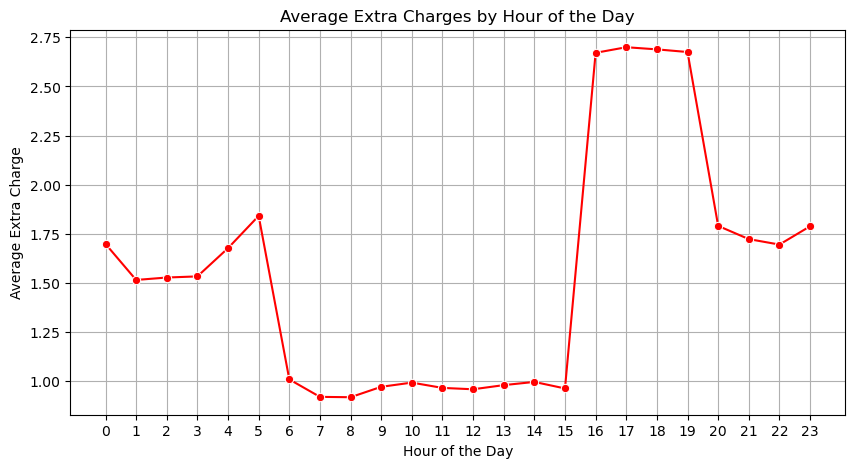

In [305]:
# Plotting of average extra charges by hour of the day
plt.figure(figsize=(10, 5))
sns.lineplot(x="hour", y="extra", data=extra_hour, marker="o", color="red")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charge")
plt.title("Average Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [308]:
# Grouping of extra charges by day of the week
extra_day = fare_per_passenger.groupby("day_of_week")["extra"].mean().reset_index()

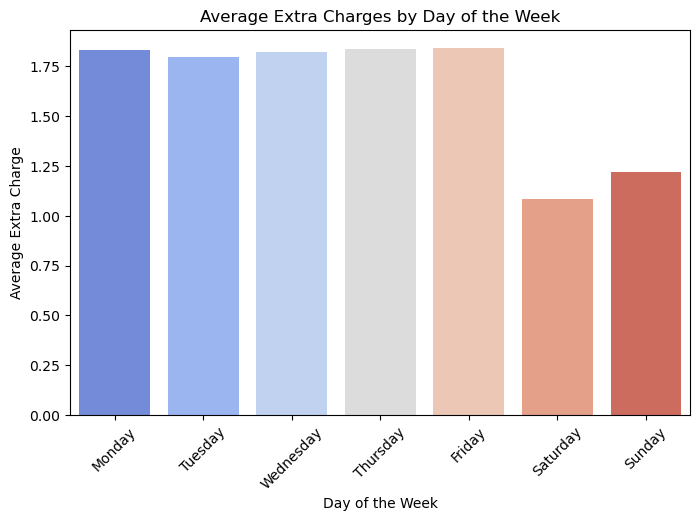

In [309]:
#Plotting extra charges by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x="day_of_week", y="extra", data=extra_day, palette="coolwarm")

plt.xlabel("Day of the Week")
plt.ylabel("Average Extra Charge")
plt.title("Average Extra Charges by Day of the Week")
plt.xticks(rotation=45)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Observations:

High Pickup Zones: Upper East Side South (Location Id – 237) , Midtown Center (Location Id – 161) and Upper East Side North (Location Id – 236) found to be high pickup zones.

High Dropoff Zones: Upper East Side South (Location Id – 237) and Upper East Side North (Location Id – 236) found to be high dropoff zones.

Peak Hours: The busiest hours for pickups are during morning (7 AM – 9 AM) and evening (5 PM – 7 PM), indicating strong demand from passengers. However passenger demand reduces during Night hours (10 PM – 5 AM).

Weekend vs. Weekday Trends: Weekdays show higher pickups as compared to Weekend.

Zero Distance and Speed: There are inefficiencies in routing, with certain trips showing average zero speeds and average zero distance.

Revenue share: Revenue share for Night time hours is found to be lower than day time hours.
Traffic during night hours: Pickup during Night hours is found to be higher than dropoff counts.

Recommendations:

Zonal prioritization: Allocate more taxis to high pickup zones specially during weekdays. Taxis to avoid inefficient routes.

Increase night-time fleet: Due to higher revenue potential, encourage more drivers to operate between 10 PM – 5 AM.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Pickup/ Drop Ratio: Highest pickup/ drop ratio identified for La Guardia Airport (Location Id – 138) from 1 PM to 4 PM and 9 PM. Cabs can be positioned at the airport at the given times.

Peak Hours: The busiest hours for pickups are during morning (7 AM – 9 AM) and evening (5 PM – 7 PM), indicating strong demand from passengers. Availability of more cabs can positioned for the given timings.

Highest Pickups were observed for the month of May. Highest revenue also identified for the month of May. Availability of more cabs can positioned for the given Month.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Observations:

Average Fare per mile per Passenger – Average fare per mile found to be inversely related to the number of passengers. Average fare per mile per passenger for 1 passenger was $9 and for 6 passengers it was found to be $1.2. Single passenger is found to be paying higher fare.

Average fare per mile was highest for 4 AM (Hour), relatively same for 7 AM – 10 AM. 

Average fare per mile was highest for Wednesday (Day) and highest for short distance trips (<= 2 Miles).

Vendor ID 1 charges lesser average fare per mile as compared to Vendor 2.

Suggestions:

Increase fares during rush hours (7 AM – 10 AM)

Consider number of passengers for calculation of average fare per mile per passenger. As the number of passengers increase, average fare per mile should also increase.

Higher positioning of cabs for short distance trips will enable earning of more revenue.

Vendor ID 1 can match average fare per mile with Vendor ID 2 to have competitive rates.
